# <center><strong><font color="blue">Pendahuluan Text Mining & Social Network Analytics</font></strong></center>
<center><img alt="" src="images/SocMed.png"/> </center>
    
## <center>(C) Taufik Sutanto - 2020 <br><strong><font color="blue"> tau-data Indonesia ~ https://tau-data.id</font></strong></center>

* https://tau-data.id/sma-01/
* https://tau-data.id/sna-01/
* https://tau-data.id/nlptm-01/
* https://tau-data.id/nlptm-02/
* https://tau-data.id/nlptm-03/

## Outline :

* Pendahuluan NLP & Text Mining
* Text Preprocessing
* Document Representation
* Sentiment Analysis
* Topic Modelling

# Natural Language Processing (NLP) - Pemrosesan Bahasa Alami (PBA):

<p>
&quot;<big><em>Sebuah cabang ilmu&nbsp;(AI/Computational Linguistik) yang mempelajari bagaimana&nbsp;bahasa (alami) manusia (terucap/tertulis) dapat dipahami dengan baik oleh komputer dan komputer dapat merespon dengan cara yang serupa ke manusia</em></big>&quot;.</p>
<p><img alt="" src="images/1_jarvis.jpg" style="height: 450px; width: 600px;" /></p>

<p><a href="https://www.turn-on.de/lifestyle/topliste/zehn-film-gadgets-die-wir-uns-im-wahren-leben-wuenschen-4413" target="_blank"><strong>[Image Source]: https://www.turn-on.de/primetime/topliste/zehn-film-gadgets-die-wir-uns-im-wahren-leben-wuenschen-4413</strong></a></p>

# Aplikasi Umum NLP:

* Speech Recognition dan Classification
* Machine Translation (Misal&nbsp;https://translate.google.com/ )
* Information Retrieval (IR)&nbsp;(misal www.google.com, bing, elasticsearch, etc.)
* Man-Machine Interface (misal Chatbot, Siri, cortana, atau Alexa)
* Sentiment Analysis

# Apakah Perbedaan antara NLP dan Text Mining (TM)?

<p>TM (terkadang disebut Text Analytics) adalah sebuah pemrosesan teks (biasanya dalam skala besar) untuk menghasilkan (generate) informasi atau insights. Untuk menghasilkan informasi TM menggunakan beberapa metode, termasuk NLP. TM mengolah teks secara eksplisit, sementara NLP mencoba mencari makna latent (tersembunyi) lewat aturan bahasa (e.g. grammar/idioms/Semantics).<br /></p><p>
    
<strong>Contoh aplikasi TM</strong> : Social Media Analytics (SMA), Insights from customer's review, Sentiment Analysis, Topic Modelling, dsb.</p>


<p><img alt="https://www.kdnuggets.com/2017/11/framework-approaching-textual-data-tasks.html" src="images/1_NLP_TextMining.jpg" style="height: 470px; width: 600px;" /></p>

<p>[image source: <a href="https://www.elsevier.com/books/practical-text-mining-and-statistical-analysis-for-non-structured-text-data-applications/miner/978-0-12-386979-1" target="_blank">Gary M.:&quot;Practical Text Mining and Statistical Analysis for Non-structured Text Data Applications&quot;</a>]</p>


<p><img alt="" src="images/1_Text_Analytics.jpg" style="height: 451px; width: 600px;" /></p>

<p>[Image Source: <a href="http://www.pearson.com.au/products/S-Z-Turban-Sharda/Business-Intelligence-and-Analytics-Systems-for-Decision-Support-Global-Edition/9781292009209?R=9781292009209" target="_blank">Efraim T. &quot;Business Intelligence and Analytics: Systems for Decision Support, Global Edition (10e)</a>&quot;]</p>


# Modul-modul yang digunakan di Lesson ini 
## Silahkan install melalui terminal jika dijalankan secara lokal (PC/Laptop)

### Perhatian: Anda harus menjalankan setiap cell secara berurutan dari paling atas, tanpa terlewat satu cell-pun.

In [ ]:
# Jalankan Cell ini "HANYA" jika anda menggunakan Google Colab
# Jika di jalankan di komputer local, silahkan lihat NLPTM-02 untuk instalasinya.
import warnings; warnings.simplefilter('ignore')
import nltk

!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/data_sna.csv
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

!pip install spacy python-crfsuite unidecode textblob sastrawi pyLDAvis graphviz
!python -m spacy download en
!python -m spacy download xx
!python -m spacy download en_core_web_sm

nltk.download('popular')

In [1]:
# Importing Modules untuk Notebook ini
import graphviz, warnings; warnings.simplefilter('ignore')
import taudata_sna as tau
from graphviz import Digraph
import taudataNlpTm as tau, itertools, re, pickle, pyLDAvis, pyLDAvis.sklearn, spacy, urllib.request
import time, numpy as np, matplotlib.pyplot as plt, networkx as nx, pandas as pd, seaborn as sns 
from matplotlib.colors import ListedColormap
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tag import CRFTagger
from gensim.models import Phrases
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from gensim.models import Word2Vec, FastText
import tweepy, json, nltk, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs

pyLDAvis.enable_notebook()
sns.set(style="ticks", color_codes=True)
random_state = 99
'Done'

c:\winpython\python-3.6.8.amd64\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


'Done'

## Tokenisasi

<p>Tokenisasi adalah pemisahan kata, simbol, frase, dan entitas penting lainnya (yang disebut sebagai token) dari sebuah teks untuk kemudian di analisa lebih lanjut. Token dalam NLP sering dimaknai dengan &quot;sebuah kata&quot;, walau tokenisasi juga bisa dilakukan ke kalimat, paragraf, atau entitas penting lainnya (misal suatu pola string DNA di Bioinformatika).</p>

<p><strong>Mengapa perlu tokenisasi?</strong></p>

<ul>
	<li>Langkah penting dalam preprocessing, menghindari kompleksitas mengolah langsung pada string asal.</li>
	<li>Menghindari masalah (semantic) saat pemrosesan model-model natural language.</li>
	<li>Suatu tahapan sistematis dalam merubah unstructured (text) data ke bentuk terstruktur yang lebih mudah di olah.</li>
</ul>

<p><img alt="" src="images\2_Pipeline_Tokenization.png" style="height:300px; width:768px" /><br />
[<a href="https://www.softwareadvice.com/resources/what-is-text-analytics/" target="_blank"><strong>Image Source</strong></a>]: https://www.softwareadvice.com/resources/what-is-text-analytics/</p>


<h2 id="Tokenisasi-dengan-modul-NLTK">Tokenisasi dengan modul NLTK</h2>

<p><strong>Kelebihan</strong>:</p>

<ol>
	<li>Well established dengan dukungan bahasa yang beragam</li>
	<li>Salah satu modul NLP dengan fungsi terlengkap, termasuk WordNet</li>
	<li>Free dan mendapat banyak dukungan akademis.</li>
</ol>

<p><strong>Kekurangan</strong>:</p>

<ol>
	<li>&quot;Tidak support&quot;&nbsp;bahasa Indonesia</li>
	<li>Murni Python: relatif lebih lambat</li>
</ol>

<p><big><strong><a href="https://www.nltk.org/" target="_blank">https://www.nltk.org/</a></strong></big></p>


In [2]:
T = "Hello, Mr. Man. He smiled!! This, i.e. that, is it."
Word_Tokens = nltk.word_tokenize(T)
print(Word_Tokens) # tokenisasi kata

['Hello', ',', 'Mr.', 'Man', '.', 'He', 'smiled', '!', '!', 'This', ',', 'i.e', '.', 'that', ',', 'is', 'it', '.']


In [3]:
# Bandingkan jika menggunakan fungsi split di Python, apakah bedanya? 
print(T.split())
# Apakah kesimpulan yang bisa kita tarik?
# Split() ==> Bukan Tokenisasi!.

['Hello,', 'Mr.', 'Man.', 'He', 'smiled!!', 'This,', 'i.e.', 'that,', 'is', 'it.']


In [4]:
Sentence_Tokens = nltk.sent_tokenize(T)
print(Sentence_Tokens) # Tokenisasi kalimat
# Perhatikan hasilnya, ada berapa kalimat yang di deteksi? setuju?

['Hello, Mr. Man.', 'He smiled!!', 'This, i.e.', 'that, is it.']


## Tokenisasi dengan <font color="blue"> TextBlob</font>
<strong>Kelebihan</strong>:</p>
<ol>
	<li>Sederhana &amp; mudah untuk digunakan/pelajari.</li>
	<li>Textblob objects punya behaviour/properties yang sama dengan string di Python.</li>
	<li>TextBlob dibangun dari kombinasi modul NLTK dan (Clips) Pattern</li>
</ol>

<p><strong>Kekurangan</strong>:</p>
<ol>
	<li>Tidak secepat Spacy dan NLTK</li>
	<li>Language Model terbatas: English, German, French</li>
</ol>

<p>*Blob : Binary large Object</p>

In [5]:
# Tokenizing di TextBlob
from textblob import TextBlob

T = "Hello, Mr. Man. He smiled!! This, i.e. that, is it."
print(TextBlob(T).words)

['Hello', 'Mr', 'Man', 'He', 'smiled', 'This', 'i.e', 'that', 'is', 'it']


In [6]:
kalimatS = TextBlob(T).sentences
print([str(kalimat) for kalimat in kalimatS])

['Hello, Mr. Man.', 'He smiled!!', 'This, i.e.', 'that, is it.']


## Tokenisasi tidak hanya language dependent, tapi juga environment dependent

<p>Tokenization sebenarnya tidak sesederhana memisahkan berdasarkan spasi dan removing symbol. Sebagai contoh dalam bahasa Jepang/Cina/Arab suatu kata bisa terdiri dari beberapa karakter.</p>

<p><img alt="" src="images/2_Tokenization_Complexity.jpg" style="height:500px; width:686px" /><br />
[<a href="http://aclweb.org/anthology/Y/Y11/Y11-1038.pdf" target="_blank"><strong>Image Source</strong></a>]</p>


## Tokenisasi (NLP) Bahasa Indonesia:

<p>NLTK belum support Bahasa Indonesia, bahkan module NLP Python yang support bahasa Indonesia secara umum masih sangat langka. Beberapa <u><strong>resources </strong></u>yang dapat digunakan:</p>

<ol>
	<li><strong><a href="https://github.com/kirralabs/indonesian-NLP-resources" target="_blank">KirraLabs</a></strong>: Mix of NLP-TextMining resources</li>
	<li><strong><a href="https://pypi.python.org/pypi/Sastrawi/1.0.1" target="_blank">Sastrawi 1.0.1</a>:</strong>&nbsp;untuk &quot;stemming&quot; &amp;&nbsp;<strong><a href="https://devtrik.com/python/stopword-removal-bahasa-indonesia-python-sastrawi/" target="_blank">stopwords&nbsp;</a></strong>bahasa Indonesia.</li>
	<li><strong><a href="http://stop-words-list-bahasa-indonesia.blogspot.co.id/2012/09/daftar-kata-dasar-bahasa-indonesia.html" target="_blank">Daftar Kata Dasar Indonesia</a></strong>:&nbsp;Bisa di load sebagai dictionary di Python</li>
	<li><strong><a href="https://id.wiktionary.org/wiki/Wiktionary:ProyekWiki_bahasa_Indonesia/Daftar_kata" target="_blank">Wiktionary</a></strong>: ProyekWiki bahasa Indonesia [termasuk Lexicon]</li>
	<li><a href="http://wn-msa.sourceforge.net/" target="_blank"><strong>WordNet Bahasa Indonesia</strong></a>: Bisa di load&nbsp;sebagai dictionary (atau NLTK<em>*</em>) di Python.</li>
	<li><strong><a href="http://kakakpintar.com/daftar-kata-baku-dan-tidak-baku-a-z-dalam-bahasa-indonesia/" target="_blank">Daftar Kata Baku-Tidak Baku</a></strong>: Bisa di load sebagai dictionary di Python.</li>
	<li><strong><a href="https://spacy.io/" target="_blank">Spacy</a></strong>: Cepat/efisien, MIT License, tapi language model Indonesia masih terbatas.</li>
	<li><a href="http://ufal.mff.cuni.cz/udpipe" target="_blank"><strong>UdPipe</strong></a>: Online request &amp; restricted license (support berbagai bahasa -&nbsp;pemrograman).</li>
</ol>

In [7]:
# Contoh Tokenisasi dalam bahasa Indonesia dengan Spacy
from spacy.lang.id import Indonesian
nlp_id = Indonesian()  # Language Model

teks = 'Sore itu, Hamzah melihat kupu-kupu di taman. Ibu membeli oleh-oleh di pasar'
tokenS_id = nlp_id(teks)
print([t for t in tokenS_id])

[Sore, itu, ,, Hamzah, melihat, kupu-kupu, di, taman, ., Ibu, membeli, oleh-oleh, di, pasar]


In [8]:
# Jika menggunakan Language model English:
from spacy.lang.en import English
nlp_en = English()

tokenS_en = nlp_en(teks)
print([token.text for token in tokenS_en])

['Sore', 'itu', ',', 'Hamzah', 'melihat', 'kupu', '-', 'kupu', 'di', 'taman', '.', 'Ibu', 'membeli', 'oleh', '-', 'oleh', 'di', 'pasar']


<p><u><big><strong>Word Case</strong></big></u><big> (Huruf BESAR/kecil):</big></p>

<ul>
	<li>Untuk menganalisa makna (<em>semantic</em>) dari suatu (frase) kata dan mencari informasi dalam proses textmining, seringnya (*) kita tidak membutuhkan informasi huruf besar/kecil dari kata&nbsp;tersebut.</li>
	<li><em>Text case normaliation</em> dapat dilakukan pada string secara efisien tanpa melalui tokenisasi (mengapa?).</li>
	<li>Namun, bergantung pada analisa teks yang akan digunakan pengguna harus berhati-hati dengan urutan proses (pipelining) dalam preprocessing. Mengapa dan apa contohnya?</li>
</ul>

<p>(*) Coba temukan minimal 2 pengecualian dimana&nbsp; huruf kapital/kecil (case) mempengaruhi makna/pemrosesan teks.</p>

In [9]:
# Ignore case (huruf besar/kecil)
T = "Hi there!, I am a student. Nice to meet you :)"
print(T.lower())
print(T.upper())
# Perintah ini sangat efisien karena hanya merubah satu bit di setiap (awal) bytes dari setiap karakter
# Sehingga tetap efisien jika ingin dilakukan sebelum tokenisasi

hi there!, i am a student. nice to meet you :)
HI THERE!, I AM A STUDENT. NICE TO MEET YOU :)


## Morphological-Linguistic Normalization: Stemming &amp; Lemmatization
(Canonical Representation)
<p><img alt="" src="images/2_yoda.jpg" style="height:400px; width:400px" /></p>


## <font color="blue">Stemming dan Lemma</font>

<ol>
	<li>
	<p><strong>Stemmer</strong>&nbsp;akan menghasilkan sebuah bentuk kata yang disepakati oleh suatu sistem tanpa mengindahkan konteks kalimat. Syaratnya beberapa kata dengan makna serupa hanya perlu dipetakan secara konsisten ke sebuah kata baku.&nbsp;Banyak digunakan di IR &amp;&nbsp;komputasinya relatif sedikit. Biasanya dilakukan dengan menghilangkan imbuhan (suffix/prefix).</p>
	</li>
	<li>
	<p><strong>lemmatisation</strong> akan menghasilkan kata baku (dictionary word) dan bergantung konteks.</p>
	</li>
	<li>
	<p>Lemma &amp; stemming bisa jadi sama-sama menghasilkan suatu akar kata (root word). Misal : <em>Melompat </em>==&gt; <em>lompat</em></p>
	</li>
</ol>

<p><strong>Mengapa melakukan Stemming &amp; Lemmatisasi</strong>?</p>

<ol>
	<li>Sering digunakan di IR (Information Retrieval) agar ketika seseorang mencari kata tertentu, maka seluruh kata yang terkait juga diikutsertakan.<br />
	Misal:&nbsp;<em>organize</em>,&nbsp;<em>organizes</em>, and&nbsp;<em>organizing&nbsp;</em>&nbsp;dan&nbsp;<em>democracy</em>,&nbsp;<em>democratic</em>, and&nbsp;<em>democratization</em>.</li>
	<li>Di Text Mining Stemming dan Lemmatisasi akan mengurangi dimensi (mengurangi variasi morphologi), yang terkadang akan meningkatkan akurasi.</li>
	<li>Tapi di IR efeknya malah berkebalikan: <strong><font color="blue">meningkatkan recall, tapi menurunkan akurasi&nbsp;</font></strong>[<a href="https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html" target="_blank"><strong>Link</strong></a>]. Contoh: kata&nbsp;<em>operate, operating, operates, operation, operative, operatives, dan operational</em>&nbsp;jika di stem menjadi <em>operate</em>, maka ketika seseorang mencari &quot;<em>operating system</em>&quot;, maka entry seperti&nbsp;<em>operational and research</em> dan&nbsp;<em>operative and dentistry</em>&nbsp;akan muncul sebagai entry dengan relevansi yang cukup tinggi.</li>
</ol>


In [10]:
# Contoh Lemmatizer di NLTK
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
T = "apples and Oranges are similar. boots and hippos aren't, don't you think?"
print('Sentence: ', T)
print('Lemmatize: ',' '.join(lemmatizer.lemmatize(t) for t in T.split()))
# Lemma case sensitive. Dengan kata lain string harus diubah ke dalam bentuk huruf kecil (lower case)

Sentence:  apples and Oranges are similar. boots and hippos aren't, don't you think?
Lemmatize:  apple and Oranges are similar. boot and hippo aren't, don't you think?


In [11]:
# Lemmatizer menggunakan informasi pos. "pos" (part-of-speech) akan dibahas di segmen berikutnya
print(lemmatizer.lemmatize("better", pos="a")) # adjective
print(lemmatizer.lemmatize("better", pos="v")) # verb

good
better


In [12]:
# TextBlob Stemming & Lemmatizer
from textblob import Word
# Stemming
print(Word('running').stem()) # menggunakan NLTK Porter stemmer

# Lemmatizer
print(Word('went').lemmatize('v'))

# default Noun, plural akan menjadi singular dari akar katanya
# Juga case sensitive

run
go


In [13]:
# Spacy Lemmatizer English
import spacy
nlp = spacy.load("en_core_web_sm")

E = "I am sure apples and oranges are similar"
doc = nlp(E)

for token in doc:
    print(token.text, token.lemma_)
# Perhatikan huruf besar/kecil

I -PRON-
am be
sure sure
apples apple
and and
oranges orange
are be
similar similar


### Spacy "tidak" (bukan belum) support Stemming:

<p><strong><img alt="" src="images/2_Spacy_Pipelines.jpg" style="height:400px; width:487px" /></strong></p>

<p>[<a href="https://spacy.io/usage/spacy-101#lightning-tour" target="_blank"><strong>Image Source</strong></a>]</p>

In [14]:
# Lemmatizer dengan Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

I = "perayaan itu Berbarengan dengan saat kita bepergian ke Makassar"
print(stemmer.stem(I))
print(stemmer.stem("Perayaan Bepergian Menyuarakan"))
# Ada beberapa hal yang berbeda antara Sastrawi dan modul-modul diatas.
# Apa sajakah?

raya itu bareng dengan saat kita pergi ke makassar
raya pergi suara


## Text Level Normalization: StopWords
<p><u>Di Text Mining</u> kata-kata yang <strong>sering muncul </strong>(dan jarang sekali muncul) memiliki sedikit sekali informasi (signifikansi) terhadap model (machine learning) yang digunakan. Hal ini di karenakan kata-kata tersebut muncul di semua kategori (di permasalahan klasifikasi) atau di semua cluster (di permasalahan pengelompokan/clustering). Kata-kata yang sering muncul ini biasa disebut &quot;StopWords&quot;. Stopwords berbeda-beda bergantung dari Bahasa dan Environment (aplikasi)-nya.<br />
<strong>Contoh</strong>:<br />

<ul>
	<li>Stopwords bahasa Inggris: am, is, are, do, the, of, etc.</li>
	<li>Stopwords bahasa Indonesia: adalah, dengan, yang, di, ke, dsb</li>
	<li>Stopwords twitter: RT, ...<br />
	<img alt="" src="images/2_StopWords.png" style="height:250px; width:419px" /></li>
</ul>


In [15]:
# Loading Stopwords: Ada beberapa cara
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()

NLTK_StopWords = stopwords.words('english')
Sastrawi_StopWords_id = factory.get_stop_words()

df=open('data/stopwords_en.txt',"r",encoding="utf-8", errors='replace')
en_stop = df.readlines()
df.close()
en_stop = [t.strip().lower() for t in en_stop]

df=open('data/stopwords_id.txt',"r",encoding="utf-8", errors='replace')
id_stop = df.readlines()
df.close()
id_stop = [t.strip().lower() for t in id_stop]

N = 10
print(NLTK_StopWords[:N])
print(Sastrawi_StopWords_id[:N])
print(en_stop[:N])
print(id_stop[:N])
print(len(Sastrawi_StopWords_id), len(id_stop), len(NLTK_StopWords), len(en_stop))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua']
['&gt', '&lt', '&nbsp', 'a', 'able', 'about', 'above', 'abst', 'accordance', 'according']
['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir']
126 758 179 2659


### Diskusi: Apakah sebaiknya kita menggunakan daftar stopwords bawaan modul atau custom milik kita sendiri?

In [16]:
# Tipe variabel memiliki aplikasi optimal yang berbeda-beda, misal
L = list(range(10**7))
S = set(range(10**7)) # selain unik dan tidak memiliki keterurutan, set memiliki fungsi lain.

In [17]:
%%timeit
99000000 in L

194 ms ± 11.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%%timeit
99000000 in S

67.8 ns ± 3.74 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [19]:
# Tips: selalu rubah list stopwords ke bentuk set, karena di Python jauh lebih cepat untuk cek existence di set ketimbang list
NLTK_StopWords = set(NLTK_StopWords)
Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)
en_stop = set(en_stop)
id_stop = set(id_stop)

In [20]:
'adalah' in id_stop

True

In [21]:
# Cara menggunakan stopwords
from textblob import TextBlob

T = "I am doing NLP at tau-data Indonesia,... \
    adapun saya anu sedang belajar NLP di tau-data Indonesia"
T = T.lower()
id_stop.add('anu')
Tokens = TextBlob(T).words # Tokenisasi 
T2 = [t for t in Tokens if t not in id_stop] # Sastrawi_StopWords_id Personal_StopWords_en Personal_StopWords_id
T2 = [t for t in T2 if t not in en_stop] # Sastrawi_StopWords_id Personal_StopWords_en Personal_StopWords_id
print(' '.join(T2))
# Catatan: Selalu lakukan Stopword filtering setelah tokenisasi (dan normalisasi).

nlp tau-data indonesia belajar nlp tau-data indonesia


<p><img alt="" src="images/2_Tokenization_Stopwords.png" style="height:400px; width:765px" /></p>

<p>[<a href="http://chdoig.github.io/acm-sigkdd-topic-modeling/#/6/2" target="_blank">image source: http://chdoig.github.io/acm-sigkdd-topic-modeling/#/6/2</a>]</p>


## Menangani Slang atau Singkatan di Data Teks 

In [22]:
# Sebuah contoh sederhana 
T = 'jangan ragu gan, langsung saja di order pajangannya.'
# Misal kita hendak mengganti setiap singkatan (slang) dengan bentuk penuhnya. 
# Dalam hal ini kita hendak mengganti 'gan' dengan 'juragan'
H = T.replace('gan','juragan')
print(H)
# Kita tidak bisa melakukan ini

janjuragan ragu juragan, langsung saja di order pajanjuragannya.


In [23]:
D = {'yg':'yang', 'gan':'juragan'}
D['yg']

'yang'

In [24]:
# dengan tokenisasi
slangs = {'gan':'juragan', 'yg':'yang', 'dgn':'dengan'} #dictionary sederhana berisi daftar singkatan dan kepanjangannya

T = 'jangan ragu gan, langsung saja di order pajangan yg diatas.'
T = TextBlob(T).words
T

WordList(['jangan', 'ragu', 'gan', 'langsung', 'saja', 'di', 'order', 'pajangan', 'yg', 'diatas'])

In [25]:
for i,t in enumerate(T):
    if t in slangs.keys():
        T[i] = slangs[t]
print(' '.join(T))

jangan ragu juragan langsung saja di order pajangan yang diatas


In [26]:
# Loading Slang dan Singkatan dari File
# Contoh memuat word fix melalui import file. 
df=open('data/slang.txt',"r",encoding="utf-8", errors='replace')
slangS = df.readlines(); df.close()
slangS[:5] 

['& : dan\n',
 '1pun : satupun\n',
 '7an : tujuan\n',
 '@ : di\n',
 'Dr : dokter\n']

In [27]:
slangS = [t.strip('\n').strip() for t in slangS]
print(slangS[:5])

['& : dan', '1pun : satupun', '7an : tujuan', '@ : di', 'Dr : dokter']


In [28]:
A = 'luv:love'
B = A.split(':')
B

['luv', 'love']

In [29]:
A ='  apa  '
A.strip()

'apa'

In [30]:
# pisahkan berdasarkan ':'
slangS = [t.split(":") for t in slangS]
slangS = [[k.strip(), v.strip()] for k,v in slangS]
print(slangS[:3])
slangS = {k:v for k,v in slangS}
print(slangS['7an'])

[['&', 'dan'], ['1pun', 'satupun'], ['7an', 'tujuan']]
tujuan


In [31]:
# Test it!
tweet = 'I luv u say. serius gan!, tapi ndak tau kalau sesok.'
T = TextBlob(tweet).words

for i,t in enumerate(T):
    if t in slangS.keys():
        T[i] = slangS[t]
        
print(' '.join(T))

I love untuk sayang serius juragan tapi tidak tahu kalau besok


## Machine Language Detection and Translation
<p><img alt="" src="images/Machine_Translation_Models.png" /></p>


image Sources: 
* https://www.freecodecamp.org/news/a-history-of-machine-translation-from-the-cold-war-to-deep-learning-f1d335ce8b5/
* https://medium.com/analytics-vidhya/seq2seq-model-and-the-exposure-bias-problem-962bb5607097

In [32]:
#Language Detection (TextBlob)
from textblob import TextBlob
T = "Aku ingin mengerti NLP dalam bahasa Inggris"
U = "jarene iki boso jowo"
print(TextBlob(T).detect_language())
print(TextBlob(U).detect_language())

id
jw


In [33]:
# Machine Translation (TextBlob)
# Butuh koneksi internet, limited calls. Error otherwise. Need "try" and "catch".
T = "Aku ingin mengerti NLP dalam bahasa Inggris. I love you"
print(TextBlob(T).translate(to='en'))
print(TextBlob(T).translate(to='ar-sa'))
print(TextBlob(T).translate(to='ja'))
# daftar kode bahasa : http://www.cardinalpath.com/resources/tools/google-analytics-language-codes/
# Perhatikan TextBlob secara automatis akan mendeteksi bahasa asal

I want to understand NLP in English. I love you
أريد أن أفهم البرمجة اللغوية العصبية في اللغة الإنجليزية. انا احبك
NLPを英語で理解したい。わたしは、あなたを愛しています


In [34]:
# Kalau secara spesifik ingin translate dari suatu bahasa ke bahasa lain:
T = "Aku hanya ingin mengatakan ... saya lapar ... hungry bro"
print(TextBlob(T).translate(from_lang ='id', to='en'))

I just wanted to say ... I'm hungry ... hungry bro


## Encoding-Decoding:

<ul>
	<li>Hal berikutnya yang perlu diperhatikan dalam memproses data teks adalah encoding-decoding.</li>
	<li>Contoh Encoding: ASCII, utf, latin, dsb.</li>
	<li>saya membahas lebih jauh tetang encoding disini:&nbsp;<br />
	<a href="https://tau-data.id/memahami-string-python/" target="_blank">https://tau-data.id/memahami-string-python/</a></li>
	<li>Berikut adalah sebuah contoh sederhana tantangan proses encoding-decoding ketika kita hendak memproses data yang berasal dari internet atau media sosial.</li>
</ul>


In [35]:
# kita bisa menggunakan modul unidecode untuk mendapatkan representasi ASCII terdekat
from unidecode import unidecode

T = "ḊḕḀṙ ₲ØĐ, p̾l̾e̾a̾s̾e ḧḕḶṖ ṁḕ"
print(unidecode(T).lower())
# Bahasa Indonesia dan Inggris secara umum mampu direpresentasikan dalam encoding ASCII: 
# https://en.wikipedia.org/wiki/ASCII

dear god, please help me


In [36]:
# Kita juga bisa membersihkan posting media sosial/website dengan entitas html menggunakan fungsi "unescape" di modul "html"
from html import unescape

print(unescape('Satu &lt; Tiga&nbsp;&amp; &#169; adalah simbol Copyright'))

Satu < Tiga & © adalah simbol Copyright


# Representasi Dokumen

<h1 id="Vector-Space-Model---VSM">Vector Space Model - VSM</h1>

<p><img alt="" src="images/vsm.png" style="width: 300px; height: 213px;" /></p>


<ul>
	<li>Data multimedia seperti teks, gambar atau video <strong>tidak dapat</strong>&nbsp;<strong>secara langsung</strong>&nbsp;dianalisa dengan model statistik/data mining.</li>
	<li>Sebuah proses awal&nbsp;<em>(pre-process)</em>&nbsp;harus dilakukan terlebih dahulu untuk merubah data-data tidak (semi) terstruktur tersebut menjadi bentuk yang dapat digunakan oleh model statistik/data mining konvensional.</li>
	<li>Terdapat berbagai macam cara mengubah data-data tidak terstruktur tersebut ke dalam bentuk yang lebih sederhana, dan ini adalah suatu bidang ilmu tersendiri yang cukup dalam. Sebagai contoh saja sebuah teks biasanya dirubah dalam bentuk vektor/<em>topics</em>&nbsp;terlebih dahulu sebelum diolah.</li>
	<li>Vektor data teks sendiri bermacam-macam jenisnya: ada yang berdasarkan eksistensi (<strong><em>binary</em></strong>), frekuensi dokumen (<strong>tf</strong>), frekuensi dan invers jumlah dokumennya dalam corpus (<strong><a href="https://en.wikipedia.org/wiki/Tf%E2%80%93idf" target="_blank">tf-idf</a></strong>), <strong>tensor</strong>, dan sebagainya.</li>
	<li>&nbsp;Proses perubahan ini sendiri biasanya tidak&nbsp;<em>lossless</em>, artinya terdapat cukup banyak informasi yang hilang. Maksudnya bagaimana? Sebagai contoh ketika teks direpresentasikan dalam vektor (sering disebut sebagai model <strong>bag-of-words</strong>) maka informasi urutan antar kata menghilang.&nbsp;</li>
</ul>

<p><img alt="" src="images/3_structureData.png" style="height:270px; width:578px" /></p>


<p><strong>Contoh bentuk umum representasi dokumen:</strong></p>


<p><img alt="" src="images/3_Bentuk umum representasi dokumen.JPG" style="height: 294px ; width: 620px" /></p>

<p>Pada Model <em>n-grams</em> kolom bisa juga berupa frase.</p>

<h2 id="Document-Term-Matrix-:-Vector-Space-Model---VSM">Document-Term Matrix : Vector Space Model - VSM</h2>

<p><img alt="" src="images/vsm_matrix.png" style="width: 500px; height: 283px;" /></p>


<p><img alt="" src="images/3_rumus tfidf.png" style="height:370px; width:367px" /></p>


<p><img alt="" src="images/3_tfidf logic.jpg" style="height:359px; width:638px" /></p>

<p><img alt="" src="images/3_variant tfidf.png" style="height:334px; width:955px" /></p>
K = |d|

<h3>Mari awali dengan me-load contoh dataset dokumen yang cukup tenar: &quot;20 NewsGroup&quot;</h3>

<img alt="" src="images/6_20News.jpg" style="height: 300px ; width: 533px" />

<p><a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups" target="_blank">http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups</a></p>


<p><strong>Categories </strong>=&nbsp;</p>
<pre>
[&#39;alt.atheism&#39;, &#39;comp.graphics&#39;, &#39;comp.os.ms-windows.misc&#39;, &#39;comp.sys.ibm.pc.hardware&#39;, &#39;comp.sys.mac.hardware&#39;,
 &#39;comp.windows.x&#39;, &#39;misc.forsale&#39;, &#39;rec.autos&#39;, &#39;rec.motorcycles&#39;, &#39;rec.sport.baseball&#39;, &#39;rec.sport.hockey&#39;,
 &#39;sci.crypt&#39;, &#39;sci.electronics&#39;, &#39;sci.med&#39;, &#39;sci.space&#39;, &#39;soc.religion.christian&#39;, &#39;talk.politics.guns&#39;,
 &#39;talk.politics.mideast&#39;, &#39;talk.politics.misc&#39;, &#39;talk.religion.misc&#39;]</pre>


In [37]:
# Mulai dengan loading data
from sklearn.datasets import fetch_20newsgroups

try:
    f = open('data/20newsgroups.pckl', 'rb')
    data = pickle.load(f)
    f.close()
except:
    categories = ['sci.med', 'talk.politics.misc',  'rec.autos']
    data = fetch_20newsgroups(categories=categories,remove=('headers', 'footers', 'quotes'))
    f = open('data/20newsgroups.pckl', 'wb')
    pickle.dump(data, f)
    f.close()
'Done'

'Done'

In [38]:
# Merubah data ke bentuk yang biasa kita gunakan
D = [doc for doc in data.data]
Y = data.target
'Done'

'Done'

In [39]:
set(Y)

{0, 1, 2}

In [40]:
D[0]

'I want to get a car alarm and I am thinking about getting an Ungo Box.\n    Does anyone out there have any knowledge or experience with any of\n    these alarms?  How about price ranges for the different models?\n    Are these good car alarms?  Please email me any responces.\n\n                cak3@ns3.lehigh.edu'

# PreProcessing Data Text-nya

In [43]:
# pre processing
import taudataNlpTm as tau 

stops, lemmatizer = tau.LoadStopWords(lang='en')
for i,d in tqdm(enumerate(D)):
    D[i] = tau.cleanText(d, lemma=lemmatizer, stops = stops, symbols_remove = True, min_charLen = 2)
print(D[0])

1653it [00:02, 584.83it/s]

car alarm thinking ungo box knowledge experience alarms price ranges models good car alarms email responces cak3 ns3.lehigh.edu


## tf-idf:

<img alt="" src="images/toydata_vsm.png" />

* Menurut http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
* default formula tf-idf yang digunakan sk-learn adalah:
* $tfidf = tf * log(\frac{N}{df+1})$ ==> Smooth IDF
* namun kita merubahnya menjadi:
* $tfidf = tf * log(\frac{N}{df})$ ==> Non Smooth IDF
* $tfidf = tf * log(\frac{N}{df+1})$ ==> linear_tf, Smooth IDF
* $tfidf = (1+log(tf)) * log(\frac{N}{df})$ ==> sublinear_tf, Non Smooth IDF

In [44]:
# Menggunakan modul SciKit untuk merubah data tidak terstruktur ke VSM
# Scikit implementation http://scikit-learn.org/stable/modules/feature_extraction.html

from sklearn.feature_extraction.text import TfidfVectorizer

# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer

In [45]:
# VSM term Frekuensi : "tf-idf"
tfidf_vectorizer = TfidfVectorizer(smooth_idf= False, sublinear_tf=True)
tfidf = tfidf_vectorizer.fit_transform(data)
print(tfidf.shape) # Sama
print(tfidf[0].data) # Hanya data ini yg berubah
print(tfidf[0].indices) # Letak kolomnya = tfidf

(1653, 21661)
[0.12030435 0.23749834 0.30898955 0.30898955 0.30898955 0.17836885
 0.10427299 0.18282756 0.28352387 0.15677403 0.40211965 0.14845947
 0.17439317 0.20081317 0.30898955 0.16996139 0.22089276 0.18435104]
[ 7018 11570 13614  3743 16636  7148  8919 12829 15943 15344  1837  7698
 11259  3401 20364 19574  1834  3860]


### Alasan melakukan filtering berdasarkan frekuensi:
* Intuitively filter noise 
* Curse of Dimensionality (akan dibahas kemudian)
* Computational Complexity
* Improving accuracy

In [46]:
# Frequency Filtering di VSM
tfidf_vectorizer = TfidfVectorizer()
tfidf_1 = tfidf_vectorizer.fit_transform(data)

tfidf_vectorizer = TfidfVectorizer(max_df=0.75, min_df=5)
tfidf_2 = tfidf_vectorizer.fit_transform(data)

print(tfidf_1.shape)
print(tfidf_2.shape)

(1653, 21661)
(1653, 4138)


In [47]:
tfidf_vectorizer = TfidfVectorizer(lowercase=True, smooth_idf= True, sublinear_tf=True, 
                                   ngram_range=(1, 2), max_df=0.90, min_df=2)

tfidf_3 = tfidf_vectorizer.fit_transform(data)
print(tfidf_3.shape)

(1653, 17633)


<h2 id="Best-Match-Formula-:-BM25">Best-Match Formula : BM25</h2>

<p><img alt="" src="images/3_bm25_simple.png" style="height: 123px; width: 300px;" /></p>

<ol>
	<li>di IR nilai b dan k yang optimal adalah :&nbsp;<strong> <em>b</em> = 0.75&nbsp; dan k = [1.2 - 2.0]&nbsp; &nbsp;</strong><br />
	ref:&nbsp;<em>Christopher, D. M., Prabhakar, R., &amp; Hinrich, S. C. H. &Uuml;. T. Z. E. (2008). Introduction to information retrieval.&nbsp;An Introduction To Information Retrieval,&nbsp;151, 177.</em></li>
	<li>Tapi kalau untuk TextMining (clustering) nilai <strong>k optimal adalah 20, nilai b = sembarang (boleh = 0.75)</strong><br />
	ref:&nbsp;<em>Whissell, J. S., &amp; Clarke, C. L. (2011). Improving document clustering using Okapi BM25 feature weighting.&nbsp;Information retrieval,&nbsp;14(5), 466-487.</em></li>
	<li><strong>avgDL </strong>adalah rata-rata panjang dokumen di seluruh dataset dan <strong>DL </strong>adalah panjang dokumen D.<br />
	hati-hati, ini berbeda dengan &nbsp;tf-idf MySQL diatas.</li>
</ol>


In [48]:
# Variasi pembentukan matriks VSM:
d1 = '@udin76, Minum kopi pagi-pagi sambil makan pisang goreng is the best'
d2 = 'Belajar NLP dan Text Mining ternyata seru banget sadiezz'
d3 =  'Sudah lumayan lama bingits tukang Bakso belum lewat'
d4 = 'Aduh ga banget makan Mie Ayam p4k4i kesyap, please deh'

D = [d1, d2, d3, d4]
# Jika kita menggunakan cara biasa: 
tfidf_vectorizer = TfidfVectorizer()
vsm = tfidf_vectorizer.fit_transform(D)
print(tfidf_vectorizer.vocabulary_)

{'udin76': 35, 'minum': 21, 'kopi': 14, 'pagi': 24, 'sambil': 28, 'makan': 18, 'pisang': 25, 'goreng': 11, 'is': 12, 'the': 33, 'best': 6, 'belajar': 4, 'nlp': 22, 'dan': 8, 'text': 32, 'mining': 20, 'ternyata': 31, 'seru': 29, 'banget': 3, 'sadiezz': 27, 'sudah': 30, 'lumayan': 17, 'lama': 15, 'bingits': 7, 'tukang': 34, 'bakso': 2, 'belum': 5, 'lewat': 16, 'aduh': 0, 'ga': 10, 'mie': 19, 'ayam': 1, 'p4k4i': 23, 'kesyap': 13, 'please': 26, 'deh': 9}


In [49]:
# N-Grams VSM
# Bermanfaat untuk menangkap frase kata, misal: "ga banget", "pisang goreng", dsb
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
vsm = tfidf_vectorizer.fit_transform(D)
print(tfidf_vectorizer.vocabulary_)

{'udin76': 69, 'minum': 41, 'kopi': 27, 'pagi': 47, 'sambil': 55, 'makan': 34, 'pisang': 50, 'goreng': 21, 'is': 23, 'the': 65, 'best': 13, 'udin76 minum': 70, 'minum kopi': 42, 'kopi pagi': 28, 'pagi pagi': 48, 'pagi sambil': 49, 'sambil makan': 56, 'makan pisang': 36, 'pisang goreng': 51, 'goreng is': 22, 'is the': 24, 'the best': 66, 'belajar': 9, 'nlp': 43, 'dan': 16, 'text': 63, 'mining': 39, 'ternyata': 61, 'seru': 57, 'banget': 6, 'sadiezz': 54, 'belajar nlp': 10, 'nlp dan': 44, 'dan text': 17, 'text mining': 64, 'mining ternyata': 40, 'ternyata seru': 62, 'seru banget': 58, 'banget sadiezz': 8, 'sudah': 59, 'lumayan': 32, 'lama': 29, 'bingits': 14, 'tukang': 67, 'bakso': 4, 'belum': 11, 'lewat': 31, 'sudah lumayan': 60, 'lumayan lama': 33, 'lama bingits': 30, 'bingits tukang': 15, 'tukang bakso': 68, 'bakso belum': 5, 'belum lewat': 12, 'aduh': 0, 'ga': 19, 'mie': 37, 'ayam': 2, 'p4k4i': 45, 'kesyap': 25, 'please': 52, 'deh': 18, 'aduh ga': 1, 'ga banget': 20, 'banget makan': 7

In [50]:
# Vocabulary based VSM
# Bermanfaat untuk menghasilkan hasil analisa yang "bersih"
# variasi 2
d1 = '@udin76, Minum kopi pagi-pagi sambil makan pisang goreng is the best'
d2 = 'Belajar NLP dan Text Mining ternyata seru banget sadiezz'
d3 =  'Sudah lumayan lama bingits tukang Bakso belum lewat seru'
d4 = 'Aduh ga banget makan Mie Ayam p4k4i kesyap, please deh'
D = [d1,d2,d3,d4]
Vocab = {'seru banget':0, 'seru':1, 'the best':2, 'lama':3, 'text mining':4, 'nlp':5, 'ayam':6}
tf_vectorizer = CountVectorizer(binary = False, vocabulary=Vocab)
tf = tf_vectorizer.fit_transform(D)
print(tf.toarray())
tf_vectorizer.vocabulary_

[[0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0]
 [0 1 0 1 0 0 0]
 [0 0 0 0 0 0 1]]


{'seru banget': 0,
 'seru': 1,
 'the best': 2,
 'lama': 3,
 'text mining': 4,
 'nlp': 5,
 'ayam': 6}

In [51]:
Vocab = {'seru banget':0, 'the best':1, 'lama':2, 'text mining':3, 'nlp':4, 'ayam':5}
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, lowercase=True, vocabulary=Vocab)
vsm = tfidf_vectorizer.fit_transform(D)
print(tfidf_vectorizer.vocabulary_)
# VSM terurut sesuai definisi dan terkesan lebih "bersih"
# Perusahaan besar biasanya memiliki menggunakan teknik ini dengan vocabulary yang comprehensif
# Sangat cocok untuk Sentiment Analysis

{'seru banget': 0, 'the best': 1, 'lama': 2, 'text mining': 3, 'nlp': 4, 'ayam': 5}


    
# <center><strong><font color="blue"> Klasifikasi Teks dan Sentiment Analysis</font></strong></center>


In [52]:
# Mulai dengan loading data
from sklearn.datasets import fetch_20newsgroups

try:
    f = open('data/20newsgroups.pckl', 'rb')
    data = pickle.load(f)
    f.close()
except:
    categories = ['sci.med', 'talk.politics.misc',  'rec.autos']
    data = fetch_20newsgroups(categories=categories,remove=('headers', 'footers', 'quotes'))
    f = open('data/20newsgroups.pckl', 'wb')
    pickle.dump(data, f)
    f.close()
'Done'

'Done'

In [53]:
# Merubah data ke bentuk yang biasa kita gunakan
D = [doc for doc in data.data]
Y = data.target
'Done'

'Done'

In [54]:
set(Y)

{0, 1, 2}

In [55]:
D[0]

'I want to get a car alarm and I am thinking about getting an Ungo Box.\n    Does anyone out there have any knowledge or experience with any of\n    these alarms?  How about price ranges for the different models?\n    Are these good car alarms?  Please email me any responces.\n\n                cak3@ns3.lehigh.edu'

In [56]:
# pre processing
import taudataNlpTm as tau 
from tqdm import tqdm

# cleanText(T, fix={}, lemma=None, stops = set(), symbols_remove = True, min_charLen = 2, fixTag= True)
stops, lemmatizer = tau.LoadStopWords(lang='en')
for i,d in tqdm(enumerate(D)):
    D[i] = tau.cleanText(d, lemma=lemmatizer, stops = stops, symbols_remove = True, min_charLen = 2)
print(D[0])

1653it [00:08, 194.80it/s]

car alarm thinking ungo box knowledge experience    alarms price ranges models good car alarms email responces cak3 ns3.lehigh.edu


In [57]:
# Bentuk VSM-nya
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english',smooth_idf= True, sublinear_tf=True, 
                                   ngram_range=(1, 2), max_df=0.90, min_df=2)

In [58]:
from sklearn.model_selection import train_test_split
seed = 99

x_train, x_test, y_train, y_test = train_test_split(D, Y, test_size=0.3, random_state=seed)
x_train = tfidf_vectorizer.fit_transform(x_train) # "Fit_Transform"
x_test = tfidf_vectorizer.transform(x_test) # Perhatikan disini hanya "Transform"

print(x_train.shape, x_test.shape) # Jumlah kolom Sama ==> ini penting

(1157, 13127) (496, 13127)


In [59]:
# Jangan lupa langkah penting ini! ... 
# Kenapa ada yang kosong?... coba fikirkan ... 
def hapusKosong(X,Y):
    Y = Y[X.getnnz(1)>0] # delete label dokumen yang memiliki row =0 di tfidf-nya
    X = X[X.getnnz(1)>0] # Remove Zero Rows
    return X, Y

x_train, y_train = hapusKosong(x_train, y_train)
x_test, y_test = hapusKosong(x_test, y_test)
print(x_train.shape, x_test.shape)

(1105, 13127) (481, 13127)


In [60]:
# Kita gunakan metric yang umum
from sklearn.metrics import accuracy_score

In [61]:
# Naive Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
nbc = gnb.fit(x_train.toarray(), y_train) # Kelemahan Implementasinya disini

y_nbc = nbc.predict(x_test.toarray())
accuracy_score(y_test, y_nbc)
# Hati-hati Sparse ==> Dense bisa memenuhi memory untuk data relatif cukup besar
# Akurasi cukup baik

0.8669438669438669

In [62]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
from sklearn import tree

DT = tree.DecisionTreeClassifier()
DT = DT.fit(x_train, y_train)

y_DT = DT.predict(x_test)
accuracy_score(y_test, y_DT)
# Akurasi relatif rendah ==> Mengapa?

0.7297297297297297

In [63]:
# Mari coba perbaiki dengan Random Forest
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier()
RandomForest.fit(x_train, y_train)

y_RF = RandomForest.predict(x_test)
accuracy_score(y_test, y_RF)
# Sedikit membaik (expected)

0.8711018711018711

In [64]:
# SVM: http://scikit-learn.org/stable/modules/svm.html
from sklearn import svm

dSVM = svm.SVC(decision_function_shape='ovo') # oneversus one SVM
dSVM.fit(x_train, y_train)

y_SVM = dSVM.predict(x_test)
accuracy_score(y_test, y_SVM)
# Mengapa akurasinya rendah? Mengejutkan?

0.918918918918919

In [65]:
# Neural Network: http://scikit-learn.org/stable/modules/neural_networks_supervised.html
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(hidden_layer_sizes=(30, 40))
NN.fit(x_train, y_train)

y_NN = NN.predict(x_test)
accuracy_score(y_test, y_NN)
# Cukup Baik, coba rubah jumlah layer dan Neuron

0.9064449064449065

## Tunggu dulu ... yang kita lakukan belum cukup valid/objektif ... Mengapa?


<h1>Cross Validation</h1>

<h1><img alt="" src="images/6_Cross_validation.png" style="height:274px; width:485px" /></h1>


In [66]:
# Cross validation
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
from sklearn.model_selection import cross_val_score
import time

# perhatikan sekarang kita menggunakan seluruh data
# Bisa juga CV di training data ==> train, Test, Val splittting system
X = tfidf_vectorizer.fit_transform(D) # "Fit_Transform"

svm_ = svm.SVC(kernel='linear', decision_function_shape='ovo')
mulai = time.time()
scores_svm = cross_val_score(svm_, X, Y, cv=10, n_jobs=-2) 
waktu = time.time() - mulai
# Interval Akurasi 95 CI 
print("Accuracy SVM: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_svm.mean(), scores_svm.std() * 2, waktu))

Accuracy SVM: 0.91 (+/- 0.04), Waktu = 8.010 detik


In [67]:
# Bandingkan dengan Neural Network
nn_ = MLPClassifier(hidden_layer_sizes=(30, 40))
mulai = time.time()
scores_nn = cross_val_score(nn_, X, Y, cv=10, n_jobs=-2) 
waktu = time.time() - mulai
# Interval Akurasi 95 CI 
print("Accuracy ANN: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_nn.mean(), scores_nn.std() * 2, waktu))

Accuracy ANN: 0.92 (+/- 0.05), Waktu = 137.397 detik


In [68]:
# Kita bisa juga mengeluarkan metric evaluasi lainnya
scores = cross_val_score(svm_, X, Y, cv=10, scoring='f1_macro')
print("F1-Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# scoring pilih dari sini: http://scikit-learn.org/stable/modules/model_evaluation.html

F1-Score: 0.91 (+/- 0.04)


In [69]:
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt; plt.style.use('classic')
import numpy as np, pandas as pd

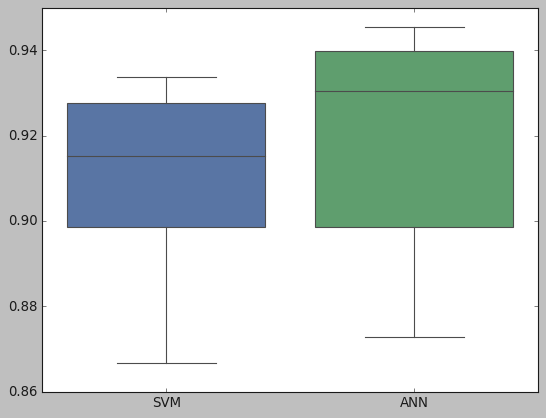

In [70]:
df = pd.DataFrame({'SVM':scores_svm,'ANN':scores_nn})
sns.boxplot(data=df)
plt.show()

<img alt="" src="images/9_Sentiment_Analysis_Meme.jpg"  />

<p><strong>Apakah sentiment analysis?</strong></p>

<p>Sentiment Analysis adalah suatu proses komputasi untuk menentukan apakah suatu penrnyataan bermakna positive, negative, atau netral.</p>

<p>Terkadang disebut juga sebagai&nbsp;<strong>opinion mining.</strong></p>

<p><strong>Contoh aplikasi Sentiment Analysis</strong></p>

<ul>
	<li><strong>Business: tanggapan konsumen atas suatu produk</strong>.</li>
	<li><strong>Politics:&nbsp;</strong>Sentimen masyarakat sebagai strategi pemenangan pemilu/pilkada.</li>
</ul>


<img alt="" src="images/9_SA_techniques.jpg" />

In [71]:
from textblob import TextBlob
# Lexicon Based berdasarkan 
# pattern = https://www.clips.uantwerpen.be/pages/pattern-en#sentiment
Sentence = "I hate Bakpia"
testimonial = TextBlob(Sentence)
print(testimonial.sentiment)
print('Polarity=Sentimen =', testimonial.sentiment.polarity)

Sentiment(polarity=-0.8, subjectivity=0.9)
Polarity=Sentimen = -0.8


<p>Sentiment menghasilkan Tuple berpasangan (<strong>Polaritas</strong>, <strong>Subjectivitas</strong>).&nbsp;</p>

<p>Polaritas memiliki nilai [-1, 1] ==&gt; negative~positive Sentimen</p>

<p>Subjectivity memiliki nilai antara 0 sampai 1, dimana 0 paling objective dan 1 paling subjective.</p>

## Bagaimana Dengan Bahasa Indonesia?
<p>[A simple trick]</p>

In [72]:
kalimat = 'Saya benci Bakpia'
K = TextBlob(kalimat).translate(to='en')
print(type(K), K)

<class 'textblob.blob.TextBlob'> I hate Bakpia


In [73]:
print(K.sentiment)
print('Polarity=Sentimen =', K.sentiment.polarity)

Sentiment(polarity=-0.8, subjectivity=0.9)
Polarity=Sentimen = -0.8


In [74]:
def SenSubModMood_ID(kalimat):
    K = TextBlob(kalimat).translate(to='en')
    pol,sub = K.sentiment
    if pol>0:
        pol='positive'
    elif pol<0:
        pol='negative'
    else:
        pol = 'netral'
    if sub>0.5:
        sub = 'Subjektif'
    else:
        sub = "Objektif"
    return pol, sub

In [75]:
kalimat = 'makan bakpia pakai kecap enak'
SenSubModMood_ID(kalimat)

('positive', 'Subjektif')

In [76]:
from textblob.sentiments import NaiveBayesAnalyzer
# Warning, mungkin lambat karena membentuk model classifier* terlebih dahulu.
# *Berdasarkan NLTK corpus ==> Language dependent
Sentence = "Textblob is amazingly simple to use"
blob = TextBlob(Sentence, analyzer=NaiveBayesAnalyzer())
blob.sentiment
# Good Explanation: https://medium.com/nlpython/sentiment-analysis-analysis-ee5da4448e37
# Output probabilitas prediksinya

Sentiment(classification='pos', p_pos=0.7952586206896557, p_neg=0.2047413793103446)

## Bagaimana dengan Sentiment Analysis menggunakan NBC untuk Bahasa indonesia?

In [77]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
 
def word_feats(words):
    return dict([(word, True) for word in words])

def bentukClassifier(wPos, wNeg): # ,Nt
    positive_features = [(word_feats(pos), 'pos') for pos in wPos]
    negative_features = [(word_feats(neg), 'neg') for neg in wNeg]
    #neutral_features = [(word_feats(neu), 'neu') for neu in Nt]
    train_set = negative_features + positive_features# + neutral_features
    return NaiveBayesClassifier.train(train_set)

def prediksiSentiment(kalimat, wPos, wNeg, negasi):
    pos, neg = 0.0, 0.0
    posWords, negWords = [], []
    K = tau.cleanText(kalimat)
    for w in wPos:
        if w in K:
            for ww in negasi:
                kebalikan = False
                inverted = ww+' '+w
                if inverted in K:
                    negWords.append(inverted)
                    kebalikan = True
                    break
            if not kebalikan:
                posWords.append(w)
    for w in wNeg:
        if w in K:
            for ww in negasi:
                kebalikan = False
                inverted = ww+' '+w
                if inverted in K:
                    posWords.append(inverted)
                    kebalikan = True
                    break
            if not kebalikan:
                negWords.append(w)
    
    nPos, nNeg = len(posWords), len(negWords)
    sum_ = nPos + nNeg
    if sum_ == 0 or nPos==nNeg:
        return 'netral', 0.0
    else:
        nPos, nNeg = nPos/sum_, nNeg/sum_
        if nPos>nNeg and nPos>0.01:
            return 'positif', nPos
        elif nNeg>nPos and nNeg<-0.01:
            return 'negatif', nNeg
        else:
            return 'netral', (nPos + nNeg)/2

In [78]:
wPos = ('keren', 'suka', 'cinta', 'bagus', 'mantap', 'sadis', 'top', 'enak', 'sedap')
wNeg = ('jelek', 'benci','buruk', 'najis')
wordS = (wPos, wNeg)
negasi = ['ga', 'tidak']

In [79]:
sentence = "makan pempek minumnya teh panas, biasa aja :)"
prediksiSentiment(sentence, wPos, wNeg, negasi)

('netral', 0.0)

In [80]:
sentence = "makan gorengan sambil minum kopi, enak tenan"
prediksiSentiment(sentence, wPos, wNeg, negasi)

('positif', 1.0)

## Bagaimana jika mau melakukannya dengan model klasifikasi (supervised learning) lain seperti modul sebelumnya?
(e.g. SVM, NN, DT, k-NN, etc)

In [81]:
# text Classification : independent variable
d1 = 'Minum kopi pagi-pagi sambil makan pisang goreng is the best'
d2 = 'Belajar NLP dan Text Mining ternyata seru banget'
d3 = 'Palembang agak mendung hari ini'
d4 =  'Sudah lumayan lama tukang Bakso belum lewat'
d5 = 'Aduh ga banget makan Mie Ayam pakai kecap, please deh'
d6 = 'Benci banget kalau melihat orang buang sampah sembarangan di jalan'
d7 = 'Kalau liat orang ga taat aturan rasanya ingin ngegampar aja'
d8 = 'Nikmatnya meniti jalan jalan penuh romansa di tengah kota bernuansa pendidikan'
d9 = 'kemajuan bangsa ini ada pada kegigihan masyarakat dalam belajar dan bekerja'
D = [d1,d2,d3,d4,d5,d6,d7,d8,d9]
'Done!'

'Done!'

In [82]:
# dependent variable, misal 0=positif, 1=netral, 2=negatif
Class = [0,0,1,1,2,2,2,1,0]
dic = {0:'positif', 1:'netral', 2:'negatif'}
print([dic[c] for c in Class])

['positif', 'positif', 'netral', 'netral', 'negatif', 'negatif', 'negatif', 'netral', 'positif']


In [83]:
# Bentuk VSM-nya seperti kemarin (skip preprocessing)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
vsm = vectorizer.fit_transform(D)
vsm = vsm[vsm.getnnz(1)>0][:,vsm.getnnz(0)>0] # Remove zero rows and columns
print(vsm.shape)
str(vectorizer.vocabulary_)[:200]

(9, 144)


"{'minum': 91, 'kopi': 65, 'pagi': 104, 'sambil': 122, 'makan': 76, 'pisang': 114, 'goreng': 43, 'is': 51, 'the': 140, 'best': 28, 'minum kopi': 92, 'kopi pagi': 66, 'pagi pagi': 105, 'pagi sambil': 10"

In [84]:
# Lakukan klasifikasi (misal dengan SVM)
dSVM = svm.SVC(kernel='linear')
sen = dSVM.fit(vsm, Class).predict(vsm)
print(accuracy_score(Class, sen))
# Memakai seluruh training data karena sampel yang sangat kecil

1.0


# <center><strong><font color="blue">Topic Modelling</font></strong></center>

## <font color="blue">Outline Topic Modelling :</font>

* Importing Data
* Pendahuluan Topic Modelling
* Soft Clustering (Topic Modelling): LDA
* Visualisasi dan Interpretasi

<h3>Ketika mengolah dokumen (file dalam bentuk teks), harapan kita seperti ini:</h3>

<img alt="" src="images/4_harapan_LSA.png" style="height:99px; width:198px" />


<h3>Namun kita sudah bahas kemarin kenyataannya seperti ini:</h3>

<p><img alt="" src="images/4_kenyataan_LSA.png" style="height:183px; width:182px" /></p>

<h2 id="Topic-Modelling-1-:-Latent-Dirichlet-Allocation">Topic Modelling 1 : Latent Dirichlet Allocation</h2>

<p><img alt="" src="images/4_Document_to_Topics.png" style="height: 300px ; width: 582px" /></p>

<p><strong><big>Tapi bukan seperti klasifikasi dan bukan berarti kata-kata Sport, Technology, dan Entertainment dominan di kategori-kategori tersebut. Topic modelling lebih ke soft-clustering, dimana suatu dokumen dimasukkan ke dalam beberapa cluster (topic) sekaligus. Adapun nama &quot;topic/cluster&quot;-nya di interpretasi dari kata-kata yang ada didalamnya.</big></strong></p>


<p><img alt="" src="images/4_LDA vs LDA.JPG" style="height:400px; width:606px" /></p>
[<a href="http://chdoig.github.io/pytexas2015-topic-modeling/" target="_blank">Sumber gambar ini dan beberapa gambar selanjutnya</a>]</p>

<p><img alt="" src="images/4_definisi topic model.JPG" style="height:350px; width:809px" />


<p><img alt="" src="images/4_inti_LDA.JPG" style="height:500px; width:785px" /></p>
Penjelasan intuitif yang baik: https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d 

# Add LDA Matrix Decomposition

<h3>Evaluasi LDA?</h3>

<p><img alt="" src="images/4_Evaluasi_LDA.jpg" style="height:400px; width:888px" /></p>
[Cara lain: http://mimno.infosci.cornell.edu/slides/details.pdf]

<p><img alt="" src="images/4_LDA Pipeline.JPG" style="height:300px; width:663px" /></p>
* Modifikasi dapat dilakukan dengan "pos tags"

In [85]:
# Kita mulai dengan membuat VSM-nya
# kita gunakan perintah yang ada di Segmen sebelumnya 
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer()

data = D.copy()
tf = tf_vectorizer.fit_transform(data)
tf_terms = tf_vectorizer.get_feature_names()
# Mengapa tf bukan tfidf?
# Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent dirichlet allocation. Journal of machine Learning research, 3(Jan), 993-1022.
# Bisa di tamahkan dengan Frequency filtering "Max_df" dan "Min_df"

tf.shape

(9, 70)

In [86]:
# Dilanjutkan dengan membentuk model LDA-nya
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_topics = 2 # Misal tidak di optimalkan terlebih dahulu
lda = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(tf)   
lda

LatentDirichletAllocation(n_components=2, random_state=0)

In [87]:
# Melihat Topik-topiknya
vsm_topics = lda.transform(tf)
print(vsm_topics.shape)
vsm_topics
# Ukuran kolom = #Topics ==> Dimension Reduction
# Mengapa tidak dibagi Train & Test???

(9, 2)


array([[0.04372308, 0.95627692],
       [0.94049548, 0.05950452],
       [0.91240676, 0.08759324],
       [0.93393382, 0.06606618],
       [0.94906527, 0.05093473],
       [0.05178167, 0.94821833],
       [0.94756669, 0.05243331],
       [0.04278007, 0.95721993],
       [0.95632988, 0.04367012]])

In [88]:
# "Seandainya" diasumsikan 1 dokumen hanya 1 topic dengan nilai skor topic terbesar
doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
doc_topic[:10]

100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 9020.01it/s]


[2, 1, 1, 1, 1, 2, 1, 2, 1]

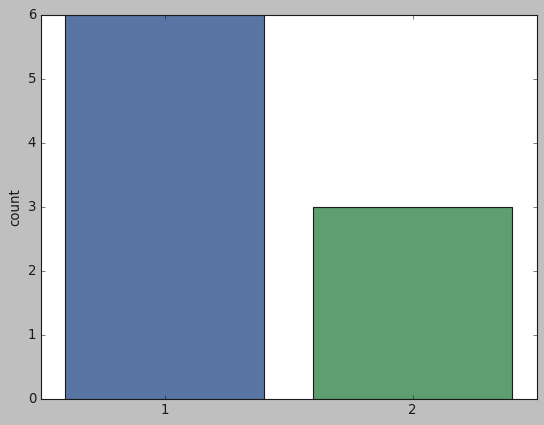

In [89]:
# mari kita plot
plot = sns.countplot(doc_topic)

In [90]:
# Mari kita coba maknai masing-masing topic ini
Top_Words = 25
print('Printing top {0} Topics, with top {1} Words:'.format(n_topics, Top_Words))
tau.print_Topics(lda, tf_terms, n_topics, Top_Words)

Printing top 2 Topics, with top 25 Words:
Topic #1:
banget dan belajar ga ini ada bekerja masyarakat kemajuan kegigihan pada dalam bangsa kecap ayam deh mie pakai please aduh aja ingin ngegampar taat rasanya
Topic #2:
jalan pagi di makan kalau orang bernuansa meniti nikmatnya pendidikan penuh kota tengah romansa minum goreng pisang sambil the best kopi is melihat benci sembarangan


In [91]:
# %matplotlib inline
# Mari kita Plot, supaya lebih jelas
# Catatan, bergantung dari laptop yang digunakan, image terkadang cukup lama untuk muncul.
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)  

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.065142  0.0       1        1  59.733535
1     -0.065142  0.0       2        1  40.266465, topic_info=         Term      Freq     Total Category  logprob  loglift
26      jalan  2.000000  2.000000  Default  30.0000  30.0000
50       pagi  1.000000  1.000000  Default  29.0000  29.0000
19         di  1.000000  1.000000  Default  28.0000  28.0000
46  nikmatnya  1.000000  1.000000  Default  27.0000  27.0000
58    romansa  1.000000  1.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
27      kalau  0.751966  1.611977   Topic2  -3.7943   0.1471
48      orang  0.751966  1.611977   Topic2  -3.7943   0.1471
7      banget  0.745078  2.190536   Topic2  -3.8035  -0.1688
40    mendung  0.251700  1.114615   Topic2  -4.8887  -0.5784
22       hari  0.251700  1.114615   Topic2  -4.8887  -0.5784

[92 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.896969       ada
1         1  0.897017      aduh
3         1  0.897032       aja
4         1  0.897032    aturan
5         1  0.897017      ayam
...     ...       ...       ...
64        1  0.897032      taat
65        2  0.965728    tengah
66        1  0.897043  ternyata
67        1  0.897043      text
68        2  0.965722       the

[65 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

# Bagaimana jika kita ingin menggunakan semi-supervised (guided) LDA?
https://medium.freecodecamp.org/how-we-changed-unsupervised-lda-to-semi-supervised-guidedlda-e36a95f3a164 

# Bagaimana melakukan Post-Tag sebelum Topic Modelling?

In [92]:
from spacy.lang.id import Indonesian
from nltk.tag import CRFTagger
nlp_id = Indonesian()  # Language Model
ct = CRFTagger()
ct.set_model_file('data/all_indo_man_tag_corpus_model.crf.tagger')

def NLPfilter(t, filters):
    tokens = nlp_id(t)
    tokens = [str(k) for k in tokens if len(k)>2]
    hasil = ct.tag_sents([tokens])
    return [k[0] for k in hasil[0] if k[1] in filters]

In [93]:
filters = set(['NN', 'NNP', 'NNS', 'NNPS', 'JJ'])

for i, d in tqdm(enumerate(data)):
    data[i] = NLPfilter(d,filters)

' '.join(data[0])

9it [00:00, 1128.01it/s]


'Minum kopi sambil pisang goreng'

In [94]:
print(data[:3])

[['Minum', 'kopi', 'sambil', 'pisang', 'goreng'], ['Belajar', 'NLP', 'Text', 'Mining', 'banget'], ['Palembang', 'hari']]


# Evaluasi: Bagaimana mendapatkan parameter Optimal Topic Modelling?

**Beberapa catatan penting**:
1. Hati-hati Struktur Data, untuk melakukan evaluasi Topic Modelling struktur data yang digunakan mirip dengan Word Embedding.
2. Kita akan melakukan cross-validasi dan N-Gram
3. Ada berbagai metric evaluasi https://radimrehurek.com/gensim/models/coherencemodel.html
4. Referensi paper: http://svn.aksw.org/papers/2015/WSDM_Topic_Evaluation/public.pdf

In [95]:
bigram_t = Phrases(data, min_count=2)
trigram_t = Phrases(bigram_t[data])
for idx, d in enumerate(data):
    for token in bigram_t[d]:
        if '_' in token:# Token is a bigram, add to document.
            data[idx].append(token)
    for token in trigram_t[d]:
        if '_' in token:# Token is a bigram, add to document.
            data[idx].append(token)

# Create a dictionary representation of the documents.
# Remove rare & common tokens
dictionary_t = Dictionary(data)
dictionary_t.filter_extremes(no_below=2, no_above=0.9)
#Create dictionary and corpus required for Topic Modeling
corpus_t = [dictionary_t.doc2bow(doc) for doc in data]
print('Number of unique tokens: %d' % len(dictionary_t))
print('Number of documents: %d' % len(corpus_t))
print(corpus_t[:1])

Number of unique tokens: 3
Number of documents: 9
[[]]


In [96]:
def compute_coherence_values(dictionary, corpus, texts, limit, coherence='c_v', start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Caution cell berikut ini membutuhkan waktu yang cukup signifikan untuk selesai, karena selain LDA *computationally expensive* loopingnya juga melakukan Cross-validasi di setiap jumlah topik *k*

In [97]:
start, step, limit = 2, 1, 10 # Ganti dengan berapa banyak Topic yang ingin di hitung/explore
coh_t, kCV = [], 10 # hati-hati sangat LAMBAT karena cross validation pada metode yang memang tidak efisien (LDA)

print('iterasi ke: ', end = ' ')
for i in range(kCV):
    print(i+1, end = ', ', flush=True)
    model_list, c = compute_coherence_values(dictionary=dictionary_t, corpus=corpus_t, texts=data, start=start, limit=limit, step=step)
    coh_t.append(c)
    
coherence_t = np.mean(np.array(coh_t), axis=0)
'Done'

iterasi ke:  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 

'Done'

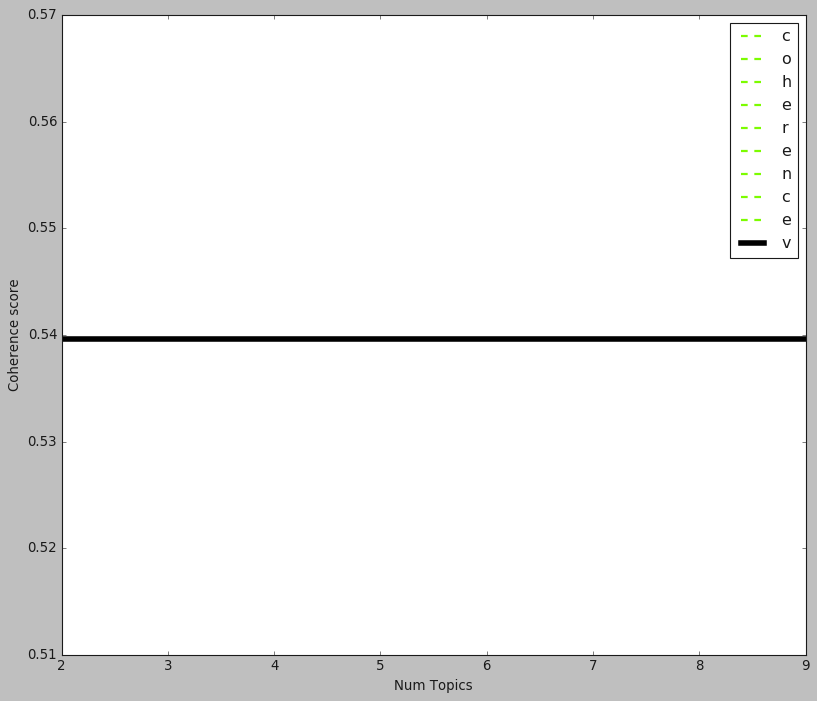

In [98]:
# Show graph
x = range(start, limit, step)
plt.figure(figsize=(12,10))
for c in coh_t:
    plt.plot(x, c, '--', color = 'lawngreen', linewidth = 2)
plt.plot(x, coherence_t, '-', color = 'black', linewidth = 5)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Referensi Pilihan:

* perhitungan Manual Topic Modelling LDA: http://brooksandrew.github.io/simpleblog/articles/latent-dirichlet-allocation-under-the-hood/
* http://mimno.infosci.cornell.edu/slides/details.pdf
* https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/
* http://www.umiacs.umd.edu/~jbg/docs/nips2009-rtl.pdf
* http://radimrehurek.com/topic_modeling_tutorial/2%20-%20Topic%20Modeling.html
* Penjelasan intuitif yang baik: https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d 
* inconjunction dengan interactive program berikut: https://lettier.com/projects/lda-topic-modeling/ 

<center><img alt="" src="images/cover_sna.png"/></center> 
<center><h1><strong>Taufik Sutanto</strong></h1></center>
<center><h2><strong><font color="blue">tau-data Indonesia</font></strong></h2></center>
<center><h2><strong><font color="blue">http://tau-data.id/sna-01/</font></strong></h2></center>

# <font color="blue">Outline:</font>

* Basic Graph in NetworkX (Python)
 - Creating Graph (adding nodes & Edges, and weights)
 - Basic Visualization
 - Degree, shortest path, Spanning Tree
* Social Network Analytics
 - Community Detection
 - Partition Analysis
 - Centrality Analysis
 - Advanced Visualization

# Pendahuluan teori graph di Python: NetworkX
## Tipe Graph

<center><img alt="" src="images/graph_types.png" />

## Tipe Graph di Python (NetworkX)

<center><img alt="" src="images/graph_types_nx.png" />

In [99]:
# Di NetworkX: inisialisasi graph kosong dilakukan seperti ini:
G1 = nx.Graph() # Di kesempatan ini Graph tak Berarah ini yang akan lebih banyak kita gunakan
G2 = nx.DiGraph()
G3 = nx.MultiGraph()
G4 = nx.MultiDiGraph()

## Contoh Graph Umum

<center><img alt="" src="images/nx_classic_graphs.png" />

In [100]:
G = nx.complete_graph(5)
G

## Visualisasi Graph

1. Graph mirip vector: tidak memiliki info lokasi
2. Maka pertama kali kita tentukan cara menggambar vertexnya dulu: pos (position)

<center><img alt="" src="images/nx_layouts.png" />

In [101]:
# Contoh
pos = nx.spiral_layout(G)
pos

{0: array([-0.40244518, -0.70883392]),
 1: array([ 0.00478817, -0.56018214]),
 2: array([ 0.26069787, -0.15027624]),
 3: array([0.24467024, 0.4192923 ]),
 4: array([-0.1077111,  1.       ])}

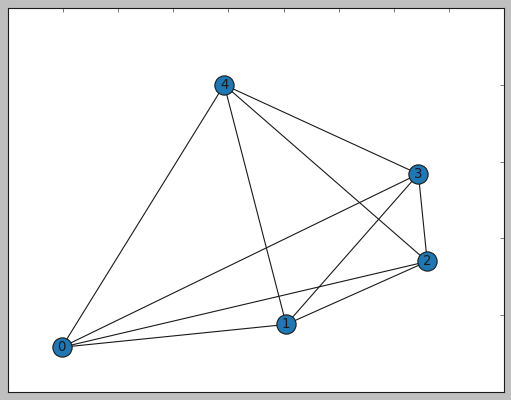

In [102]:
# Menggambar
nx.draw_networkx_nodes(G,pos) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos) # ini menggambar edge di graph G
plt.show()

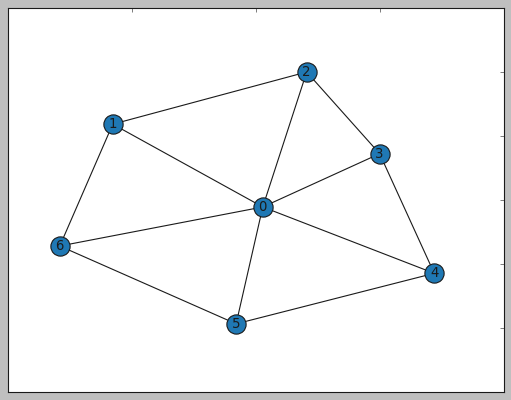

In [103]:
# Contoh lain
G = nx.wheel_graph(7)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos) # ini menggambar edge di graph G
plt.show()

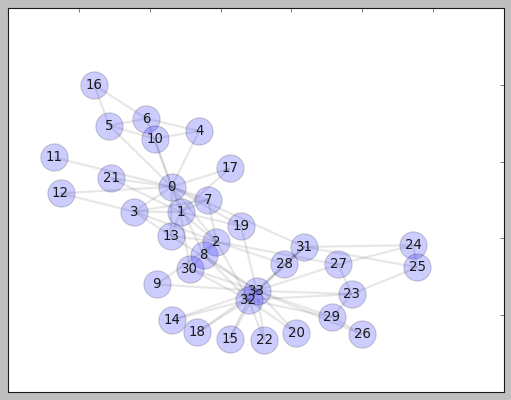

In [104]:
# Contoh lain lagi
import networkx as nx, matplotlib.pyplot as plt

g = nx.karate_club_graph()

pos = nx.spring_layout(g) # Spring LayOut
nx.draw_networkx_nodes(g,pos, alpha=0.2,node_color='blue',node_size=600) # Gambar Vertex
nx.draw_networkx_edges(g,pos,width=2,alpha=0.1) # Gambar edges
nx.draw_networkx_labels(g,pos) #Gambar Label Nodes
plt.show() # Show the graph

In [105]:
for node in g.edges(data=True):
    print(node)
    break

(0, 1, {})


In [106]:
for u,v in g.edges():
    print(u,v, end=', ')

0 1, 0 2, 0 3, 0 4, 0 5, 0 6, 0 7, 0 8, 0 10, 0 11, 0 12, 0 13, 0 17, 0 19, 0 21, 0 31, 1 2, 1 3, 1 7, 1 13, 1 17, 1 19, 1 21, 1 30, 2 3, 2 7, 2 8, 2 9, 2 13, 2 27, 2 28, 2 32, 3 7, 3 12, 3 13, 4 6, 4 10, 5 6, 5 10, 5 16, 6 16, 8 30, 8 32, 8 33, 9 33, 13 33, 14 32, 14 33, 15 32, 15 33, 18 32, 18 33, 19 33, 20 32, 20 33, 22 32, 22 33, 23 25, 23 27, 23 29, 23 32, 23 33, 24 25, 24 27, 24 31, 25 31, 26 29, 26 33, 27 33, 28 31, 28 33, 29 32, 29 33, 30 32, 30 33, 31 32, 31 33, 32 33, 

## Untuk graphics Graph yang lebih baik lagi: **GraphViz**

### Bisa untuk Analisa graph Kurikulum

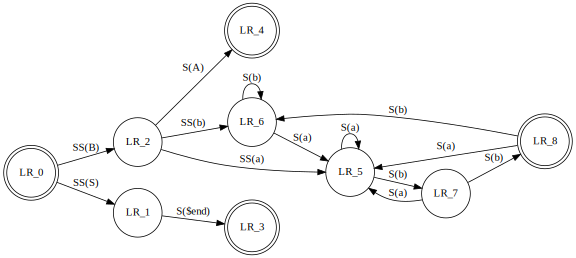

In [107]:

f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='doublecircle')
f.node('LR_0')
f.node('LR_3')
f.node('LR_4')
f.node('LR_8')

f.attr('node', shape='circle')
f.edge('LR_0', 'LR_2', label='SS(B)')
f.edge('LR_0', 'LR_1', label='SS(S)')
f.edge('LR_1', 'LR_3', label='S($end)')
f.edge('LR_2', 'LR_6', label='SS(b)')
f.edge('LR_2', 'LR_5', label='SS(a)')
f.edge('LR_2', 'LR_4', label='S(A)')
f.edge('LR_5', 'LR_7', label='S(b)')
f.edge('LR_5', 'LR_5', label='S(a)')
f.edge('LR_6', 'LR_6', label='S(b)')
f.edge('LR_6', 'LR_5', label='S(a)')
f.edge('LR_7', 'LR_8', label='S(b)')
f.edge('LR_7', 'LR_5', label='S(a)')
f.edge('LR_8', 'LR_6', label='S(b)')
f.edge('LR_8', 'LR_5', label='S(a)')

f.view()


with open("fsm.gv") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


## Membangun Graph

## Menambahkan vertex, node, dan weights

In [108]:
G = nx.Graph() # Graph Kosong
G

In [109]:
G.nodes(), G.edges()

(NodeView(()), EdgeView([]))

In [110]:
# ini adalah cara sederhana menambahkan node ke graph satu persatu
G.add_node(1)
G.add_node(99)
G.add_node(1) # "Himpunan"
print(G.nodes())

[1, 99]


In [111]:
# ini cara menambahkan array of vertices ke Graph kita
V = [1,2,5,6,8,33,65,88] # vertices

for vertex in V:
    G.add_node(vertex)
print( G.nodes() )
print( G.edges() )

[1, 99, 2, 5, 6, 8, 33, 65, 88]
[]


In [112]:
# ini cara menambahkan Edge secara manual satu per satu
G.add_edge(5, 8)
G.add_edge(8, 65)
print( G.nodes() )
print( G.edges() )

[1, 99, 2, 5, 6, 8, 33, 65, 88]
[(5, 8), (8, 65)]


In [113]:
# Kita bisa menambahkan edge walaupun di Graph kita belum ada vertexnya, vertex tersebut akan automatis ditambahkan ke graphnya
# ini cara menambahkan Edge secara manual satu per satu
# misal di contoh ini vertex 77 dan vertex "A" tidak ada sebelumnya di Graph G
G.add_edge(77, 8)
G.add_edge('Depok', 88)
print( G.nodes() )
print( G.edges() )

[1, 99, 2, 5, 6, 8, 33, 65, 88, 77, 'Depok']
[(5, 8), (8, 65), (8, 77), (88, 'Depok')]


In [114]:
# ini memahami bagaimana looping atas Array dari pasangan terurut dilakukan di python
E = [(1,33), (1,88), (6,88), (2,5), (2,8)]

for sisi in E:
    G.add_edge(sisi[0], sisi[1])
    
print( G.nodes() )
print( G.edges() )

[1, 99, 2, 5, 6, 8, 33, 65, 88, 77, 'Depok']
[(1, 33), (1, 88), (2, 5), (2, 8), (5, 8), (6, 88), (8, 65), (8, 77), (88, 'Depok')]


{1: array([0.76692427, 0.1388163 ]),
 99: array([-0.44442861,  1.        ]),
 2: array([-0.77014571, -0.40905241]),
 5: array([-0.70106701, -0.31054123]),
 6: array([0.76259738, 0.45449157]),
 8: array([-0.60242949, -0.44106346]),
 33: array([0.88124786, 0.01424519]),
 65: array([-0.6201408 , -0.61784835]),
 88: array([0.66755002, 0.30716786]),
 77: array([-0.44485574, -0.49082795]),
 'Depok': array([0.50474782, 0.35461247])}

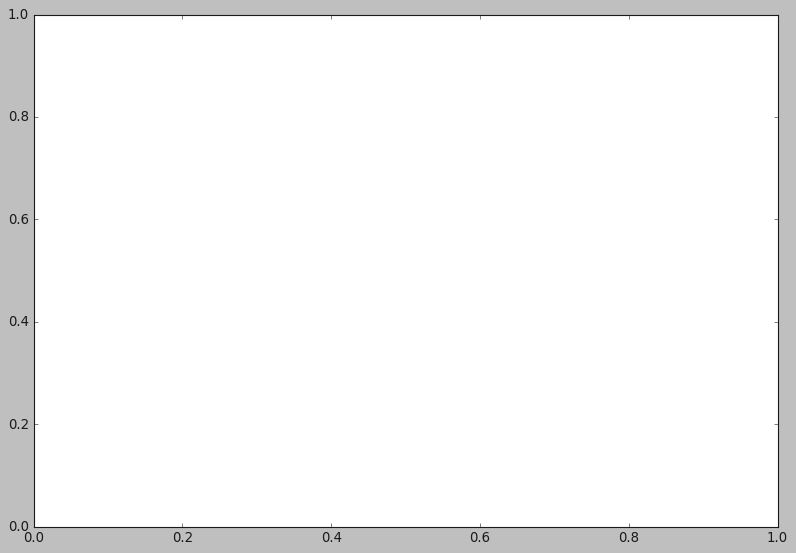

In [115]:
plt.subplots(figsize=(12,8))

pos = nx.spring_layout(G)
pos

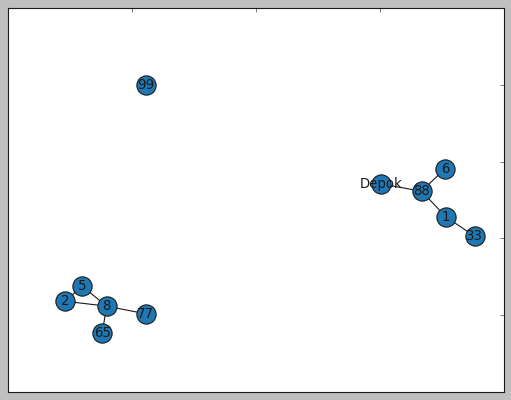

In [116]:
nx.draw_networkx_nodes(G,pos) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos) # ini menggambar edge di graph G
plt.show()

In [117]:
# Cara lain

G = nx.Graph() # Graph Kosong Baru
V = [1, 2, 7, 9, 12, 19] # Bisa juga string, misal "A" atau nama "Budi"
E = [(1,2), (2,19), (9,2), (9,1), (2,8), (8,10), (12,7),(7,2), (7,9)] # Perhatikan "8" dan "10" TIDAK ADA di V

G.add_nodes_from(V)
G.add_edges_from(E)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  8
Banyak Edges =  9


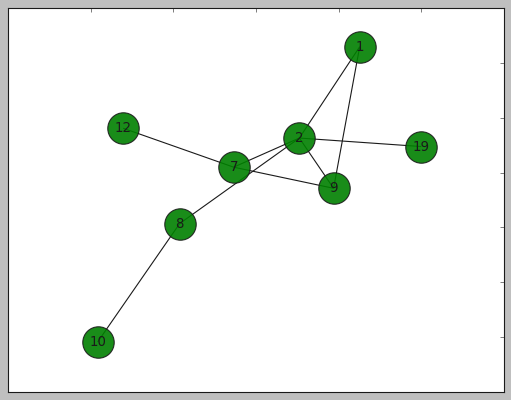

In [118]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos, alpha=0.9,node_color='green',node_size=800) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos) # ini menggambar edge di graph G
plt.show()

# Manipulasi graph: Menghapus Node atau sub-graph

In [119]:
v = [7, 12, 19]
G.remove_nodes_from(v)

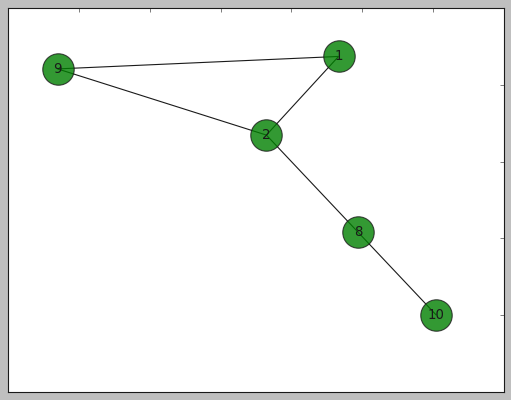

In [120]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos, alpha=0.8,node_color='green',node_size=800) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos) # ini menggambar edge di graph G
plt.show()

## Remove Edges

In [121]:
E = [(1,9)]
G.remove_edges_from(E)

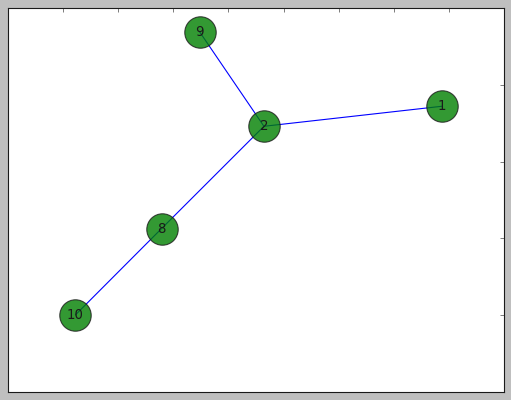

In [122]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos, alpha=0.8,node_color='green',node_size=800) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos, edge_color='blue') # ini menggambar edge di graph G
plt.show()

## Adding Graph weights/properties

In [123]:
V = ['Depok', 'Jakarta', 'Bogor', 'Bekasi', 'Tangerang']
Vluas = [12.3, 44.5, 1.2, 0.6, 23]  # contoh parameter "luas"

E = [('Depok', 'Bogor'), ('Jakarta', 'Bekasi'), ('Bekasi', 'Bogor'),
     ('Depok', 'Bekasi'), ('Tangerang', 'Bekasi')]  # ini adalah edgenya
# ini "contoh" nanti jadi parameter ke-2 dari setiap Edge di E
Ejrk = [22.4, 1.2, 5.6, 7.8, 9]

G = nx.Graph()  # graph sebelumnya tertimpa dan jadi Graph kosong kembali
# Kemudian kita akan tambahkan vertex, edge, beserta setiap parameter yg didefinisikan di atas ke graph G
for vertex, area in zip(V, Vluas):
    # nama variable parameter di setiap vertexnya di contoh ini adalah "waktu" dan "orang"
    G.add_node(vertex, luas=area)

for sisi, dist in zip(E, Ejrk):
    G.add_edge(sisi[0], sisi[1], jarak=dist)

print(G.nodes())
print(G.edges())
print('Luas Depok = ', G.nodes['Depok']['luas'])

['Depok', 'Jakarta', 'Bogor', 'Bekasi', 'Tangerang']
[('Depok', 'Bogor'), ('Depok', 'Bekasi'), ('Jakarta', 'Bekasi'), ('Bogor', 'Bekasi'), ('Bekasi', 'Tangerang')]
Luas Depok =  12.3


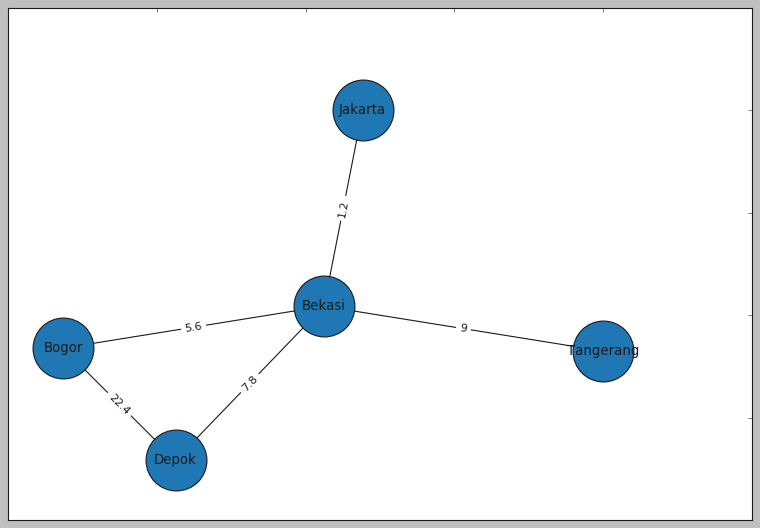

In [124]:
plt.subplots(figsize=(12,8))


pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_size=3000) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos) # ini menggambar edge di graph G
nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'jarak')) # ini label dari edgenya
plt.show()

<h1 id="Degree/Derajat-Vertex">Degree/Derajat Vertex</h1>

<p><img alt="" src="images/degree_vertex_graph.png" /></p>

In [125]:
d = nx.degree(G)
d

DegreeView({'Depok': 2, 'Jakarta': 1, 'Bogor': 2, 'Bekasi': 4, 'Tangerang': 1})

In [126]:
[d[node] for node in G.nodes()]

[2, 1, 2, 4, 1]

## Menggunakan degree untuk membuat gambar graph yang lebih baik

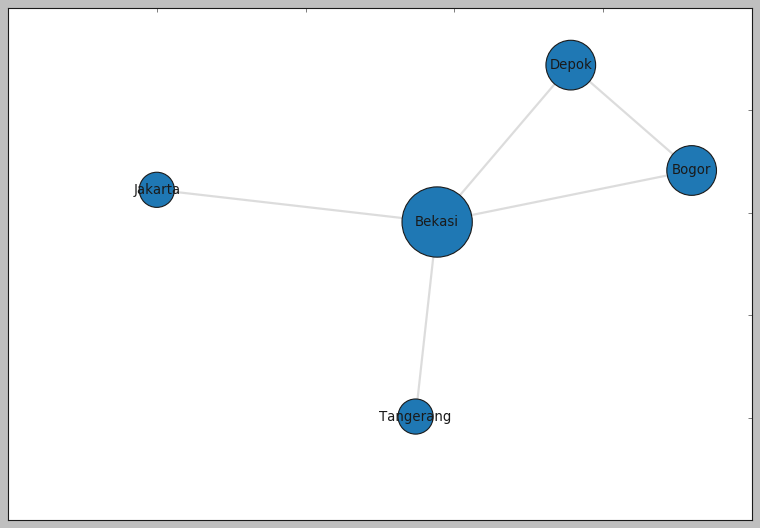

In [127]:
plt.subplots(figsize=(12,8))

pos = nx.spring_layout(G) # Spring LayOut

D = [d[node]*1000 for node in G.nodes()]
nx.draw_networkx_nodes(G,pos,node_size=D) # Gambar Vertex
nx.draw_networkx_edges(G,pos,width=2,alpha=0.15) # Gambar edges
nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
plt.show() # Show the graph

## Menambahkan informasi warna

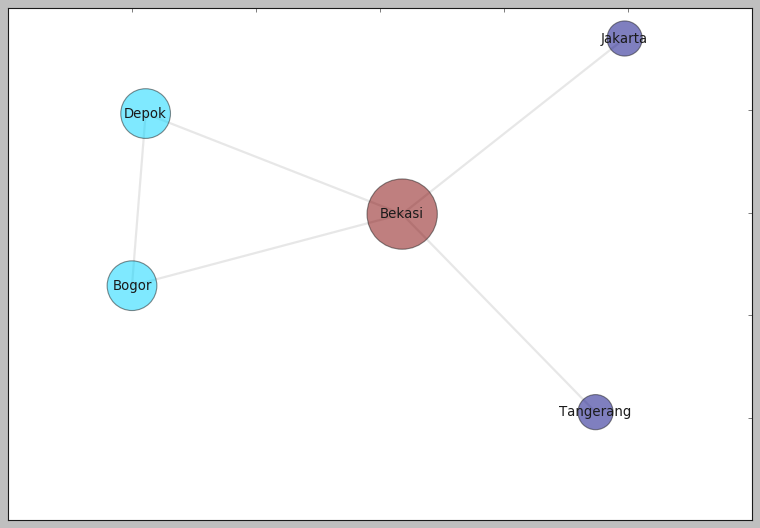

In [128]:
plt.subplots(figsize=(12,8))

warna = D
pos = nx.spring_layout(G) # Spring LayOut
nx.draw_networkx_nodes(G,pos, node_color=warna,node_size=D, alpha=0.5) # Gambar Vertex
nx.draw_networkx_edges(G,pos,width=2,alpha=0.1) # Gambar edges
nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
plt.show() # Show the graph

<h1 id="(Shortest)-Path">(Shortest) Path</h1>

<p><img alt="" src="images/shortest_path.png" /></p>

In [129]:
SP = nx.shortest_path(G, source='Jakarta', target='Bogor')
SP

['Jakarta', 'Bekasi', 'Bogor']

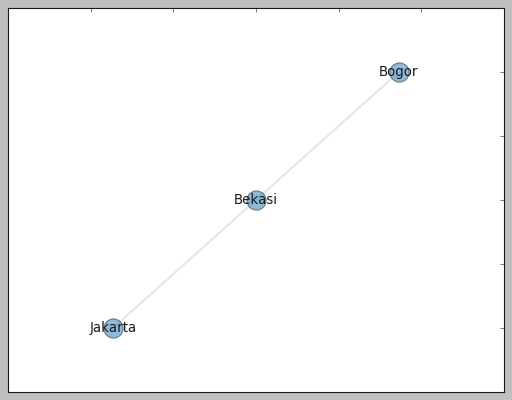

In [130]:
H = G.subgraph(SP)

pos = nx.spring_layout(H) # Spring LayOut
nx.draw_networkx_nodes(H,pos,alpha=0.5) # Gambar Vertex
nx.draw_networkx_edges(H,pos,width=2,alpha=0.1) # Gambar edges
nx.draw_networkx_labels(H,pos) #Gambar Label Nodes
plt.show() # Show the graph

<h1 id="Graph-From-Social-media">Graph From Social media</h1>

<h3 id="Mentions,-Followers,-Friends">Mentions, Followers, Friends</h3>

<p><img alt="" src="images/SNA_Graph_Types.png" /></p>

<h2>Centrality&nbsp;Analysis</h2>

<p>Bertujuan untuk menemukan pengguna yang paling berpengaruh dalam suatu topik pembicaraan di media sosial. Analisanya biasanya dilakukan melalui data graph dari hubungan jaringan pertemanan (follower/friend) antar pengguna atau komunikasi antar pengguna (mentions).</p>

<p><img alt="" src="images/8_SMA_Centrality.JPG" /></p>


<h2>Community Detection</h2>

<p>CD dilakukan pada data jaringan media sosial untuk menemukan komunitas-komunitas dalam pertemanan atau pembicaraan di media sosial. Secara sederhana CD dapat dimengerti sebagai proses clustering (pengelompokan) , namun atas suatu graph.</p>

<h2><img alt="" src="images/8_SMA_Community.JPG" /></h2>


# Case Study: twitter

* Gunakan FireFox untuk menuju ke URL: https://twitter.com/search-advanced
* Gunakan sembarang keywords untuk mengambil sampel status media sosial (misal trending topic)
* Save as html complete (misal **data.html**)
* Upload ke Google Colab

<img alt="" src="images/6_twitter.png" />

In [136]:
import taudata_sna as tau

In [137]:
# import data
f = 'data/data_sna.csv'
df = pd.read_csv(f)
df.head()

,Time,Username,Tweet,Replies,Retweets,Likes,Language,urlStatus
0,24 Sep 2017,@paultan,Mitsubishi Xpander rendered with Nissan X-Trai...,0,1,1,NaN,https://twitter.com/paultan/status/91220312337...
1,23 Oct 2017,@MyBIZ5,New post (ALL NEW MITSUBISHI XPANDER VS HYUNDA...,0,0,0,NaN,https://twitter.com/MyBIZ5/status/922713812121...
2,23 Oct 2017,@eko_wiwit,3 Paket Accessories Resmi Mitsubishi Xpander h...,0,0,0,NaN,https://twitter.com/eko_wiwit/status/922675754...
3,20 Oct 2017,@LMCAutomotive,New Mitsubishi Xpander triggers drop in August...,0,1,1,NaN,https://twitter.com/LMCAutomotive/status/92134...
4,22 Oct 2017,@MyBIZ5,New post (Review Mitsubishi xpander) has been ...,0,0,0,NaN,https://twitter.com/MyBIZ5/status/922059555298...


In [138]:
Tweets = df[' Tweet'].tolist()
Tweets[:5]

['Mitsubishi Xpander rendered with Nissan X-Trail bits https://goo.gl/fb/fiSzNp\xa0',
 'New post (ALL NEW MITSUBISHI XPANDER VS HYUNDAI STAREX ROYALE 2018) has been published on Best Images ... - https://www.winterbluemusic.com/all-new-mitsubishi-xpander-vs-hyundai-starex-royale-2018/\xa0…pic.twitter.com/6XVoFEh4QR',
 '3 Paket Accessories Resmi Mitsubishi\xa0Xpander https://mitsubishiexpanderjember.wordpress.com/2017/10/24/3-paket-accessories-resmi-mitsubishi-xpander/\xa0…pic.twitter.com/WUPJM5be5P',
 'New Mitsubishi Xpander triggers drop in August Indonesian LV sales as buyers wait for delivery of the new model: https://www.lmc-auto.com/wp-content/uploads/2017/10/LMCA-ASEAN-Light-Vehicle-Sales-Update-September-2017.pdf\xa0…',
 'New post (Review Mitsubishi xpander) has been published on Best Images Collections HD For Gadget windows Mac ... - https://www.winterbluemusic.com/review-mitsubishi-xpander/\xa0…pic.twitter.com/H8BDfLPYMb']

In [139]:
Usernames = df[' Username'].tolist()
Usernames[:5]

['@paultan', '@MyBIZ5', '@eko_wiwit', '@LMCAutomotive', '@MyBIZ5']

Please wait, building Graph .... 


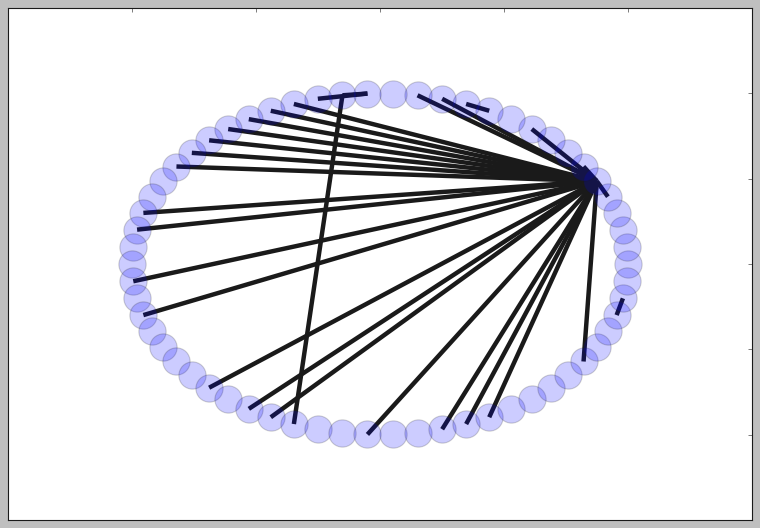

Finished. There are 62 nodes and 29 edges in the Graph.


In [140]:
# Draw the Tweet Graph
plt.subplots(figsize=(12,8))

G = tau.Graph([Usernames,Tweets], Label = False, layOut='circular', plain=True) # layOut = spring, circular, random, shells, spectral

<h2>I. Centrality Analysis</h2>

<p>Bertujuan untuk menemukan pengguna yang paling berpengaruh dalam suatu topik pembicaraan di media sosial. Analisanya biasanya dilakukan melalui data graph dari hubungan jaringan pertemanan (follower/friend) antar pengguna atau komunikasi antar pengguna (mentions).</p>

<p><img alt="" src="images/8_SMA_Centrality.JPG" /></p>


<h1 id="Centrality-by-Degree">Centrality by Degree</h1>

<p><img alt="" src="images/Degree_Centrality.png" /></p>

## Apakah interpretasinya?

In [141]:
# Let's now examine, who are the most "important" users in this Graph?
Gt = tau.Centrality(G, N=10, method='degree', outliers=False, Label = True, layOut='spring')

Influencial Users: ['YouTube', 'Mitsubishi', '@rajufebrian', 'gmail', '@fadlyjamil', '@cakdan', '@AutonetMagz', '@waykuyaa', '@BangNiko', '@autogalaxy9']
Influencial Users Scores: [0.39344262 0.03278689 0.03278689 0.01639344 0.01639344 0.01639344
 0.01639344 0.01639344 0.01639344 0.01639344]


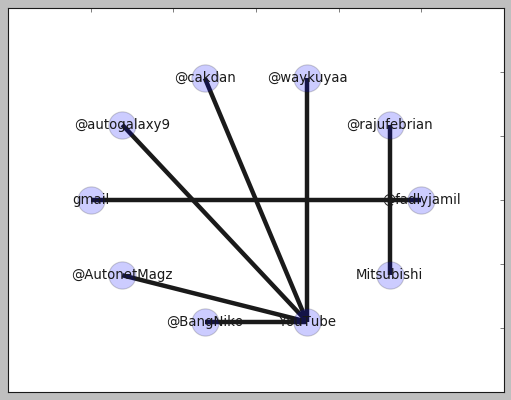

In [142]:
tau.drawGraph(Gt, True, layOut='circular')

<h1 id="Closeness-Centrality">Closeness Centrality</h1>

<p><img alt="" src="images/closeness_centrality.png" /></p>


In [143]:
Gt = tau.Centrality(G, N=10, method='closeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['YouTube', '@cakdan', '@AutonetMagz', '@waykuyaa', '@BangNiko', '@autogalaxy9', '@sj_bagus', '@antaranews', '@erlan_peetex', '@AnnissaEka']
Influencial Users Scores: [0.39344262 0.20090687 0.20090687 0.20090687 0.20090687 0.20090687
 0.20090687 0.20090687 0.20090687 0.20090687]


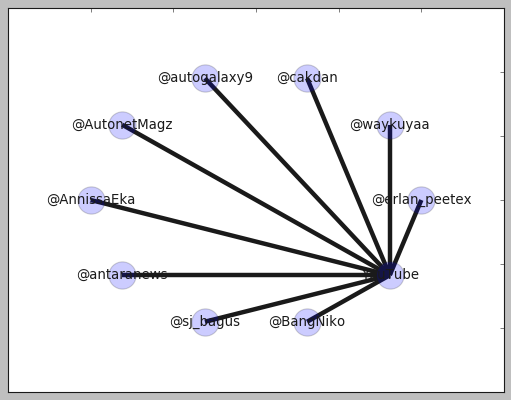

In [144]:
tau.drawGraph(Gt, True, layOut='circular')

<h1 id="Betweenness-Centrality">Betweenness Centrality</h1>

<p><img alt="" src="images/betweeness_Centrality.png" /></p>


In [145]:
Gt = tau.Centrality(G, N=10, method='betweeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['YouTube', 'Mitsubishi', '@rajufebrian', '@DapurPacu', 'gmail', '@fadlyjamil', '@Hardiansyah1303', '@fullspecprice', '@cakdan', '@autodealersa']
Influencial Users Scores: [0.15081967 0.0010929  0.0010929  0.         0.         0.
 0.         0.         0.         0.        ]


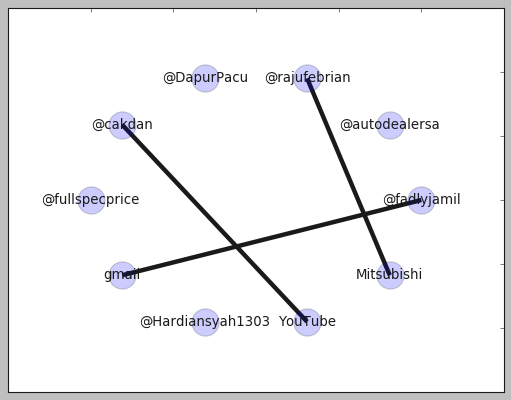

In [146]:
tau.drawGraph(Gt, True, layOut='circular')

# Eigenvector Centrality

<p><img alt="" src="images/Eigenvector_Centrality_1.png" /></p>

### Digunakan juga oleh Google dalam Algoritma PageRank-nya untuk menentukan halaman web terpenting.

<p><img alt="" src="images/Eigenvector_Centrality_0_.png" /></p>

In [147]:
Gt = tau.Centrality(G, N=10, method='eigen', outliers=False, Label = True, layOut='spring')

Influencial Users: ['YouTube', '@cakdan', '@autogalaxy9', '@AutonetMagz', '@irfan2pac', '@Sports_car_new', '@m_riskimiranto', '@waykuyaa', '@BangNiko', '@erlan_peetex']
Influencial Users Scores: [0.70710678 0.14433757 0.14433757 0.14433757 0.14433757 0.14433757
 0.14433757 0.14433757 0.14433757 0.14433757]


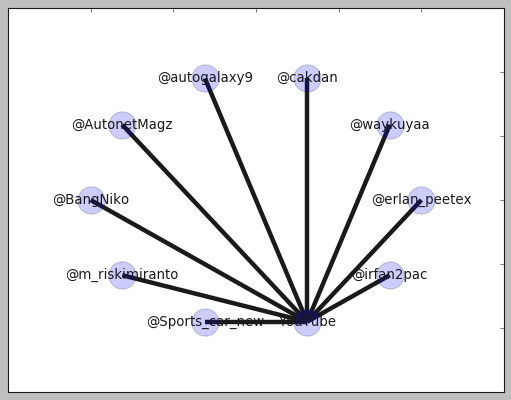

In [148]:
tau.drawGraph(Gt, True, layOut='circular')

<h1 id="Summary">Summary</h1>

<p><img alt="" src="images/Centrality_Interpretations.png" /></p>

# Centrality dapat digunakan untuk membuat visualisasi graph yang lebih baik

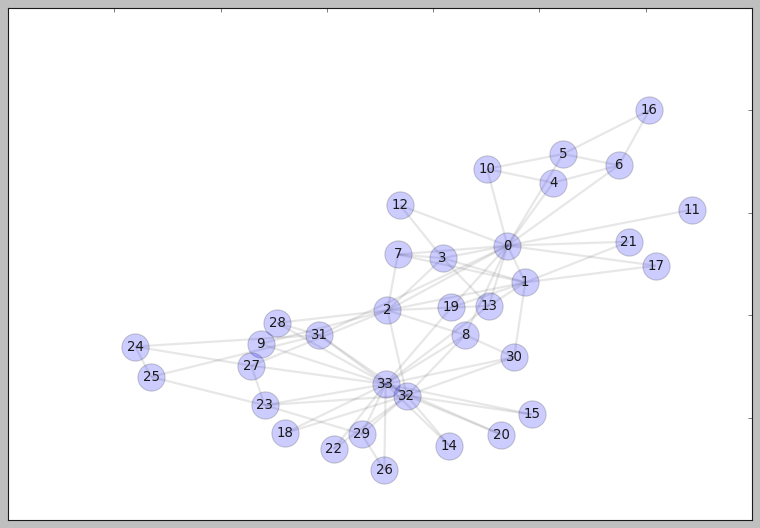

In [149]:
plt.subplots(figsize=(12,8))

g = nx.karate_club_graph()

pos = nx.spring_layout(g) # Spring LayOut
nx.draw_networkx_nodes(g,pos, alpha=0.2,node_color='blue',node_size=600) # Gambar Vertex
nx.draw_networkx_edges(g,pos,width=2,alpha=0.1) # Gambar edges
nx.draw_networkx_labels(g,pos) #Gambar Label Nodes
plt.show() # Show the graph

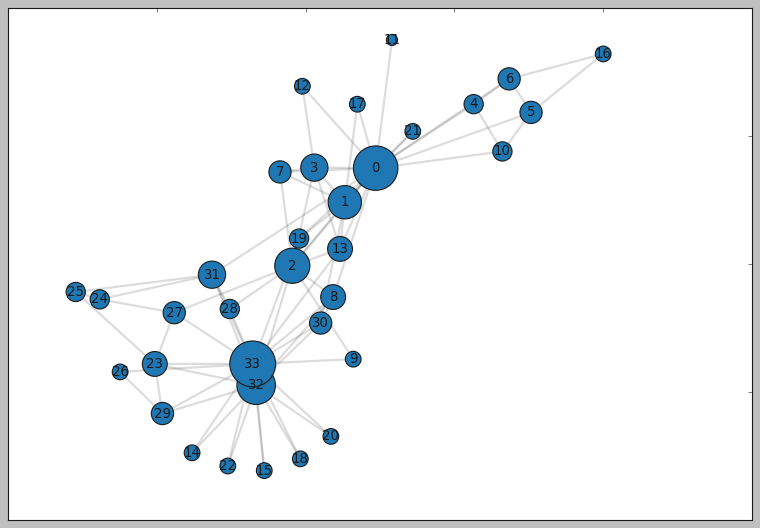

In [150]:
# Menggunakan Centrality measure (misal degree) untuk merubah ukuran node
plt.subplots(figsize=(12,8))


K = 100 # Scale factor
d = nx.degree(g) 
d = [d[node]*K for node in g.nodes()]

pos = nx.spring_layout(g) # Spring LayOut
nx.draw_networkx_nodes(g,pos,node_size=d) # Gambar Vertex
nx.draw_networkx_edges(g,pos,width=2,alpha=0.15) # Gambar edges
nx.draw_networkx_labels(g,pos) #Gambar Label Nodes
plt.show() # Show the graph

In [151]:
print(d)

[1600, 900, 1000, 600, 300, 400, 400, 400, 500, 200, 300, 100, 200, 500, 200, 200, 200, 200, 200, 300, 200, 200, 200, 500, 300, 300, 200, 400, 300, 400, 400, 600, 1200, 1700]


In [152]:
# Menggunakan tingkat "kepentingan" sebagai warna
ranking = nx.degree_centrality(g)
warna = list(ranking.values())
print(warna)

[0.48484848484848486, 0.2727272727272727, 0.30303030303030304, 0.18181818181818182, 0.09090909090909091, 0.12121212121212122, 0.12121212121212122, 0.12121212121212122, 0.15151515151515152, 0.06060606060606061, 0.09090909090909091, 0.030303030303030304, 0.06060606060606061, 0.15151515151515152, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.09090909090909091, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.15151515151515152, 0.09090909090909091, 0.09090909090909091, 0.06060606060606061, 0.12121212121212122, 0.09090909090909091, 0.12121212121212122, 0.12121212121212122, 0.18181818181818182, 0.36363636363636365, 0.5151515151515151]


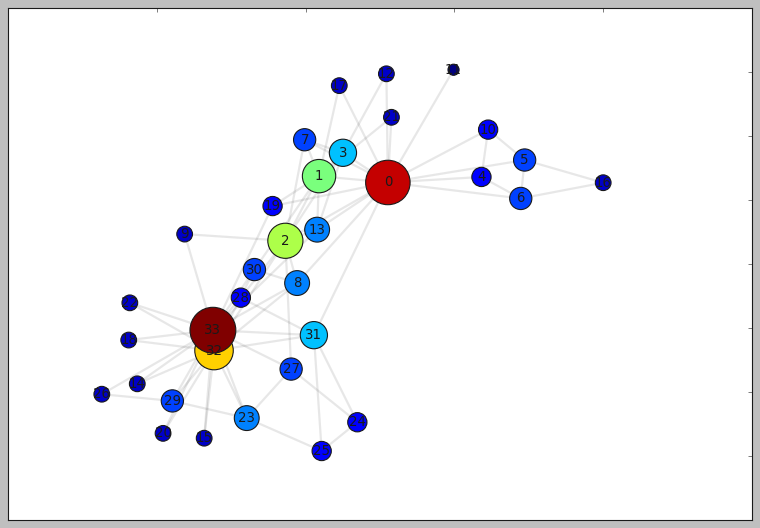

In [153]:
plt.subplots(figsize=(12,8))

pos = nx.spring_layout(g) # Spring LayOut
nx.draw_networkx_nodes(g,pos, node_color=warna,node_size=d) # Gambar Vertex
nx.draw_networkx_edges(g,pos,width=2,alpha=0.1) # Gambar edges
nx.draw_networkx_labels(g,pos) #Gambar Label Nodes
plt.show() # Show the graph

# Bipartition (Bisection) Partitioning

* <img alt="" src="images/KL_Algorithms.png" />
* This algorithm paritions a network into two sets by iteratively swapping pairs of nodes to reduce the edge cut between the two sets.
* https://www.youtube.com/watch?v=MMlf66PQdN8
* Paper: Kernighan, B. W.; Lin, Shen (1970). “An efficient heuristic procedure for partitioning graphs.” Bell Systems Technical Journal 49: 291–307. Oxford University Press 2011.

In [154]:
B = nx.algorithms.community.kernighan_lin_bisection(g)
B

({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
 {0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21})

In [155]:
warna = []
for v in B[0]:
    warna.append(1)
for v in B[1]:
    warna.append(2)

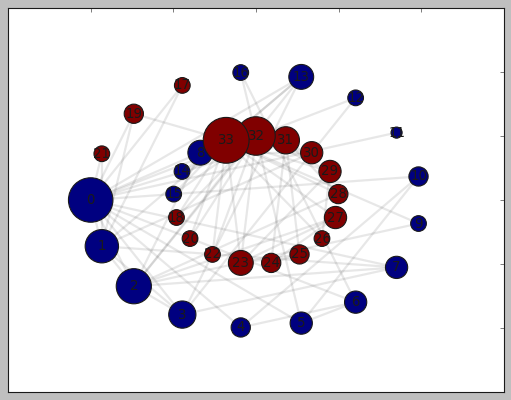

In [156]:
pos = nx.shell_layout(g, B)
nx.draw_networkx_nodes(g,pos, node_color=warna,node_size=d) # Gambar Vertex
nx.draw_networkx_edges(g,pos,width=2,alpha=0.1) # Gambar edges
nx.draw_networkx_labels(g,pos) #Gambar Label Nodes
plt.show() # Show the graph

<p><img alt="" src="images/Partitioning_VS_Clustering_Graph.png" style="width: 800px; height: 428px;" /></p>

# Graph Clustering via "Modularity"

* Modules biasa disebut juga groups, clusters atau communities
* Terdapat berbagai cara dalam menghitung "Modularity" (contoh dibawah)
* Graph with high modularity have dense connections between the nodes within "modules" but sparse connections between nodes in different modules.
* Salah satu metodenya : Greedy Modularity Maximization (GMM)
* GMM begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists.
* Clauset, A., Newman, M. E., & Moore, C. “Finding community structure in very large networks.” Physical Review E 70(6), 2004.
* Other resources for study: https://slideplayer.com/slide/7050174/

<img alt="" src="images/Graph_Modularity.png" />

<h2>II. Community Detection (CD)</h2>

<p>CD dilakukan pada data jaringan media sosial untuk menemukan komunitas-komunitas dalam pertemanan atau pembicaraan di media sosial. Secara sederhana CD dapat dimengerti sebagai proses "semacam clustering" (pengelompokan) , namun atas suatu graph.</p>

<img alt="" src="images/8_SMA_Community.JPG" />


In [157]:
# WARNING!!!... Hanya bisa jika networkX versi 2.2 ke atas 
M = nx.algorithms.community.greedy_modularity_communities(g)
print(M)

[frozenset({32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}), frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}), frozenset({0, 4, 5, 6, 10, 11, 16, 19})]


In [158]:
W = []
warna = 1
for module in M:
    for node in module:
        W.append(warna)
    warna = warna +1
print(W)

K = 100 # Scale factor
d = nx.degree(g) 
d = [d[node]*K for node in g.nodes()]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3]


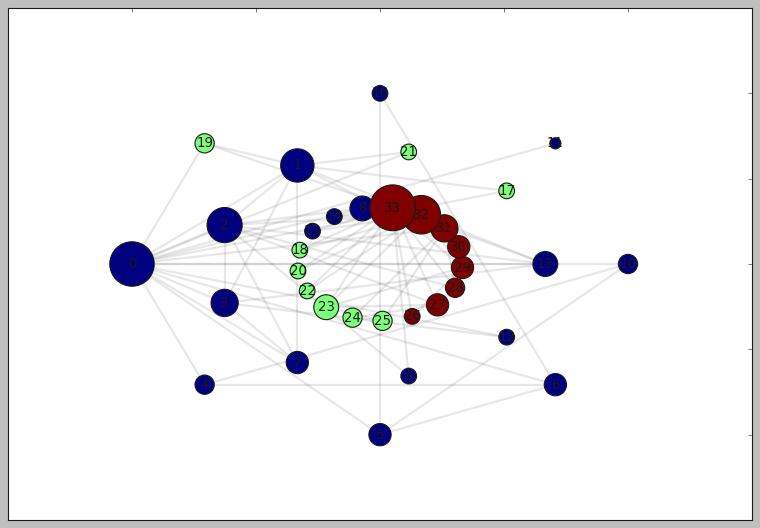

In [159]:
plt.subplots(figsize=(12,8))


pos = nx.shell_layout(g, M)
nx.draw_networkx_nodes(g,pos, node_color=W,node_size=d) # Gambar Vertex
nx.draw_networkx_edges(g,pos,width=2,alpha=0.1) # Gambar edges
nx.draw_networkx_labels(g,pos) #Gambar Label Nodes
plt.show() # Show the graph

In [160]:
# Clustering pada Graph = Community Detection
Gt = nx.algorithms.community.greedy_modularity_communities(G)
for community in Gt:
    print(community)

frozenset({'@antaranews', '@Sports_car_new', '@dailykurnia', '@rizkyprawinto', '@Bobi_Tan77', '@sj_bagus', '@BangNiko', '@H2HATDC', 'YouTube', '@waykuyaa', '@RizkyAkbar_H', '@cakdan', '@AutonetMagz', '@AndikaAhmad_', '@otodriver', '@Satoerawa', '@irfan2pac', '@erlan_peetex', '@wienmunawar', '@xanggaa', '@autogalaxy9', '@AnnissaEka', '@m_riskimiranto', '@Tiyooneheart', '@MobilQ2'})
frozenset({'carvaganza', '@BetweenTheAxles', '@rajufebrian', 'Mitsubishi'})
frozenset({'katalogpromosip', '@oneeast_id'})
frozenset({'@fadlyjamil', 'gmail'})
frozenset({'@paultan'})
frozenset({'@MyBIZ5'})
frozenset({'@eko_wiwit'})
frozenset({'@LMCAutomotive'})
frozenset({'@paula_anindia'})
frozenset({'@AUN_OFFICIAL'})
frozenset({'@waroengkezia'})
frozenset({'@carmagz_hd'})
frozenset({'@BasitMitsubishi'})
frozenset({'@Mitsubishi_ID'})
frozenset({'@bosowa_berlian'})
frozenset({'@mitsubishibmm'})
frozenset({'@max_memo2000'})
frozenset({'@AsmatMitsubishi'})
frozenset({'@indianautos'})
frozenset({'@PRio_Mitsubishi

# <center><font color="blue"> End of Module.

<hr />
